<a href="https://colab.research.google.com/github/DavideRosatelli/Intrusion-Detection-System-Data-Poisoning/blob/main/Thesis_poisonwithnoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import sklearn
import itertools
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_multi_train = pd.read_csv("y_multi_train.csv")
y_multi_test = pd.read_csv("y_multi_test.csv")

In [3]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [4]:
#dictionaries for final plots
res_log=dict()
res_rf_b=dict()
res_xgb_b=dict()
res_nn_b=dict()
res_tree=dict()
res_rf_m=dict()
res_xgb_m=dict()
res_nn_m=dict()

Noise range 1

In [5]:
def modify_dataset(dataset, variables_to_poison, noise_factor):
    poisoned_dataset = dataset.copy()
    num_samples, num_variables = poisoned_dataset.shape
    for var_index in variables_to_poison:
        noise = np.random.normal(scale=noise_factor, size=num_samples)
        poisoned_dataset[:, var_index] += noise
    return poisoned_dataset

variables_to_poison = [2, 6, 8, 9, 11, 31, 33, 34, 39, 40]
noise1 = 1
X_train_mod1 = modify_dataset(X_train, variables_to_poison, noise1)

X_train_mod1

array([[ 0.59684299, -0.20930296, -0.46131062, ...,  0.16010841,
        -1.29587715, -0.11941291],
       [-0.36703788, -0.09291996,  2.67750845, ..., -1.77855204,
        -0.07729141, -0.11941291],
       [-0.95475965, -0.20623564, -1.95234567, ...,  1.00407023,
        -0.2118499 , -0.11941291],
       ...,
       [-0.04595536, -0.20930296,  0.04023383, ...,  1.32314389,
         0.64672287, -0.11941291],
       [ 1.1713472 , -0.20930296,  1.19139423, ...,  5.2695539 ,
         2.43372036, -0.11941291],
       [ 1.32109174, -0.1171253 , -0.66569163, ...,  0.10825013,
        -0.1420076 , -0.11941291]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8960812908688902
score on train: 0.8931066442680878
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     30685
           1       0.88      0.97      0.92     54343

    accuracy                           0.90     85028
   macro avg       0.91      0.87      0.88     85028
weighted avg       0.90      0.90      0.89     85028



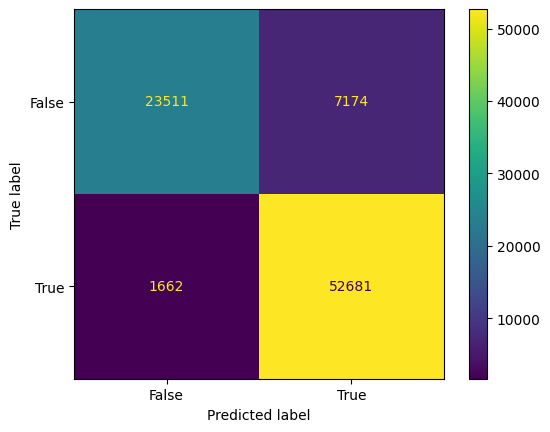

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod1, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod1, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['1']=acc

AUC: 0.9573


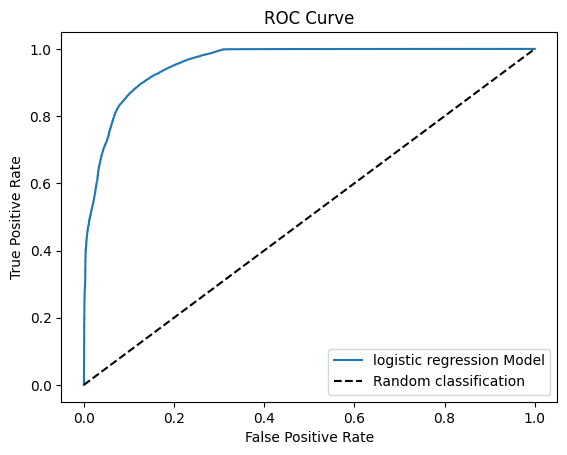

In [7]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-8-68bbbc7f51d8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod1, y_train)


score on test: 0.9500987909864985
score on train: 0.9508254648670567
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     30685
           1       0.94      0.98      0.96     54343

    accuracy                           0.95     85028
   macro avg       0.95      0.94      0.95     85028
weighted avg       0.95      0.95      0.95     85028



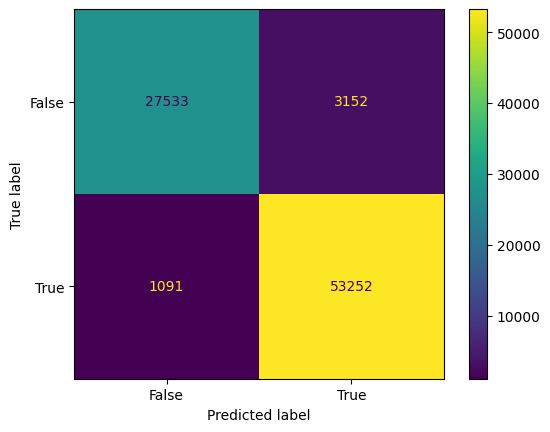

In [8]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod1, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod1, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['1']=acc

AUC: 0.9908


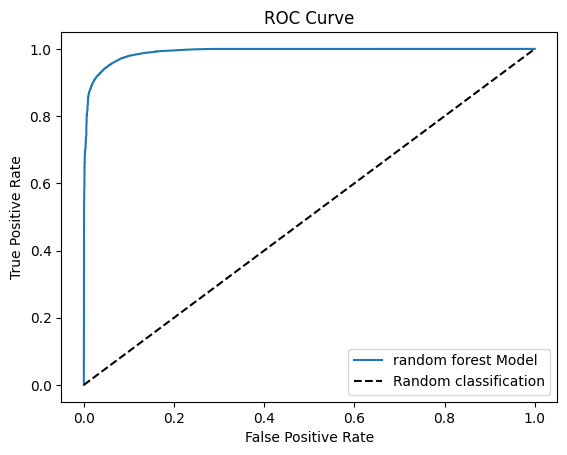

In [9]:
# ROC curve and AUC
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9704685515359647
score on train: 0.9917743150089787
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     30685
           1       0.97      0.99      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



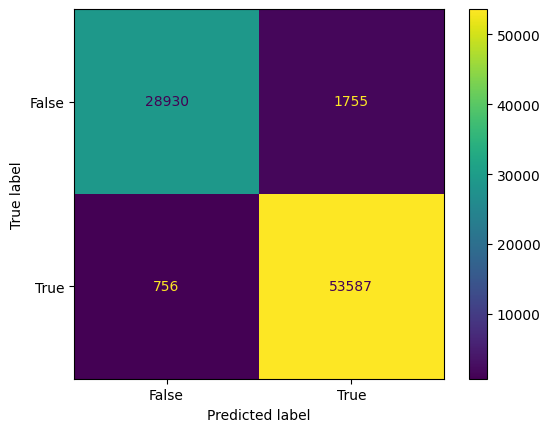

In [10]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod1, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod1, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['1']=acc

AUC: 0.9970


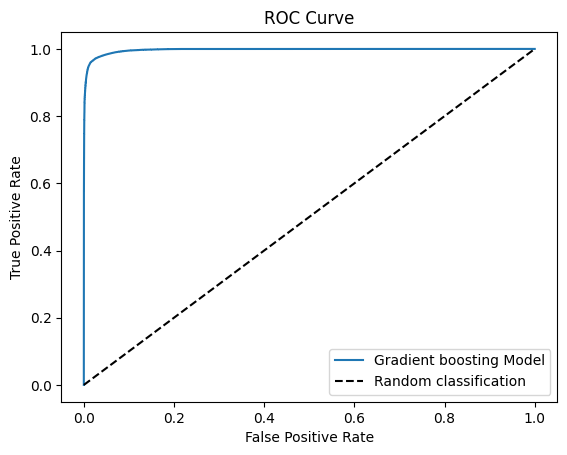

In [11]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.2018 - accuracy: 0.9078
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1597 - accuracy: 0.9259
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1387 - accuracy: 0.9378
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1132 - accuracy: 0.9523
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0968 - accuracy: 0.9597
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0899 - accuracy: 0.9627
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0857 - accuracy: 0.9644
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0835 - accuracy: 0.9654
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0803 - accuracy: 0.9667
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

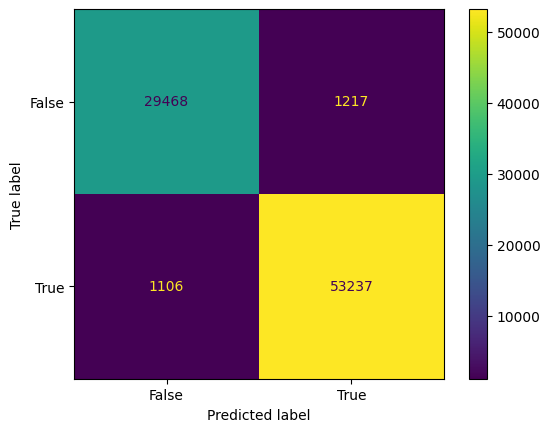

In [12]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod1, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod1,y_train)[1]))

scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['1']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [13]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



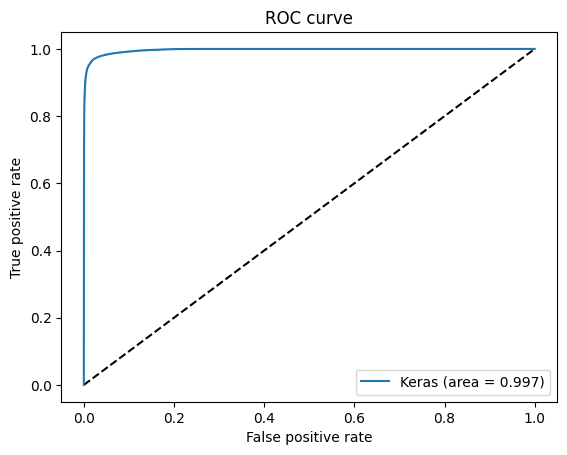

In [14]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [15]:
attack_cat=['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

score on test: 0.8084630945100437
score on train: 0.8356427040491224
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     30685
           1       1.00      0.97      0.98     19493
           2       0.56      0.78      0.65     14798
           3       0.63      0.59      0.61      7903
           4       0.44      0.15      0.22      5312
           5       0.84      0.70      0.76      4653
           6       0.53      0.06      0.12       850
           7       0.17      0.02      0.03       771
           8       0.21      0.01      0.02       509
           9       1.00      0.09      0.17        54

    accuracy                           0.81     85028
   macro avg       0.63      0.43      0.45     85028
weighted avg       0.80      0.81      0.79     85028



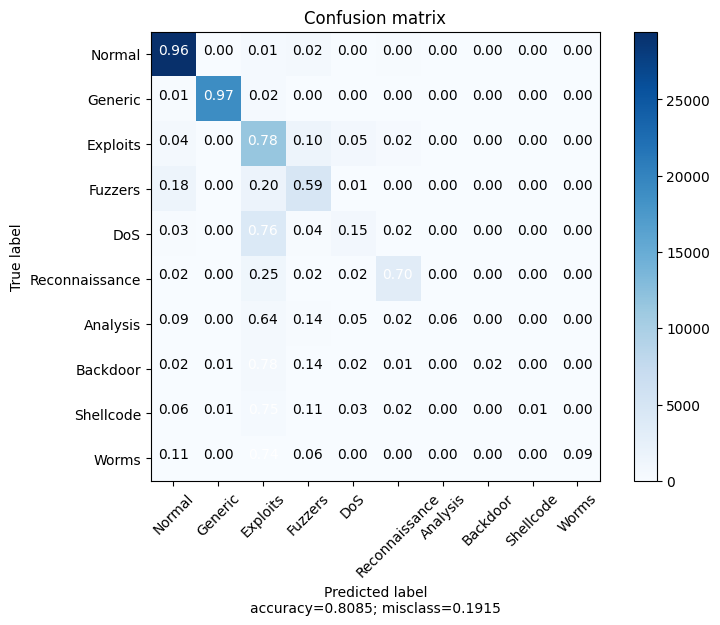

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod1, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod1, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['1']=acc

In [17]:
import yellowbrick
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization
    visualizer = ROCAUC(model)
    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer

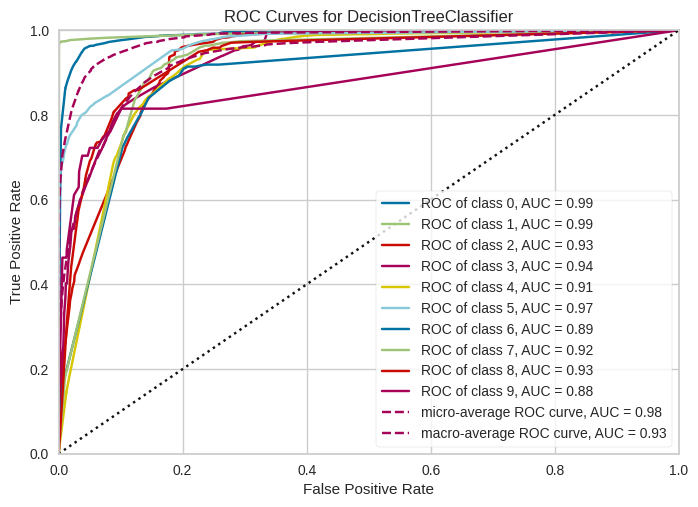

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [18]:
plot_ROC_curve(dtree1, X_train_mod1, y_multi_train, X_test, y_multi_test)

<ipython-input-19-7521fd7bd576>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod1, y_multi_train)


score on test: 0.7520111022251493
score on train: 0.8211434860684701
              precision    recall  f1-score   support

           0       0.78      0.97      0.87     30685
           1       1.00      0.83      0.90     19493
           2       0.53      0.94      0.68     14798
           3       0.80      0.34      0.48      7903
           4       0.74      0.01      0.01      5312
           5       0.98      0.33      0.49      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.75     85028
   macro avg       0.48      0.34      0.34     85028
weighted avg       0.78      0.75      0.71     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


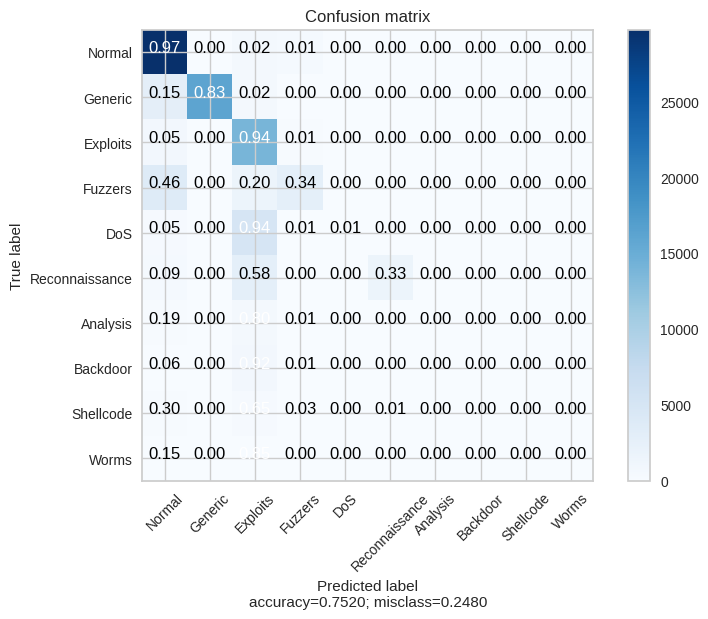

In [19]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod1, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod1, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['1']=acc

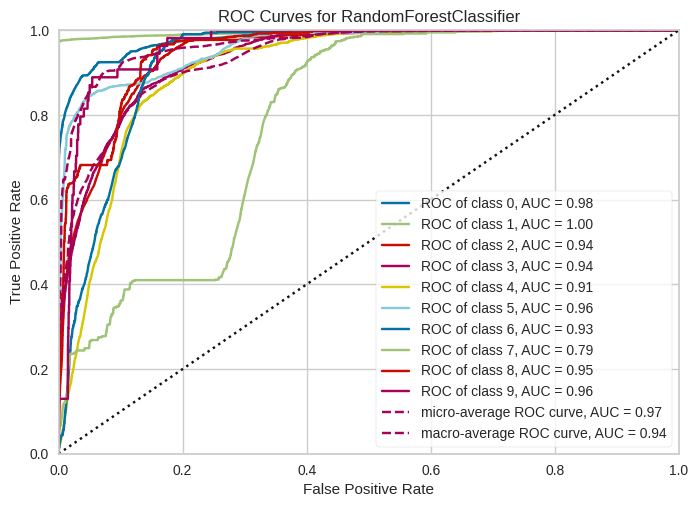

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [20]:
plot_ROC_curve(rf2, X_train_mod1, y_multi_train, X_test, y_multi_test)

score on test: 0.8338429693747942
score on train: 0.9089729479233042
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.99      0.93      0.96     19493
           2       0.64      0.81      0.71     14798
           3       0.80      0.72      0.76      7903
           4       0.32      0.31      0.32      5312
           5       0.83      0.79      0.81      4653
           6       0.56      0.05      0.10       850
           7       0.81      0.11      0.20       771
           8       0.49      0.34      0.40       509
           9       0.47      0.31      0.38        54

    accuracy                           0.83     85028
   macro avg       0.69      0.53      0.56     85028
weighted avg       0.84      0.83      0.83     85028



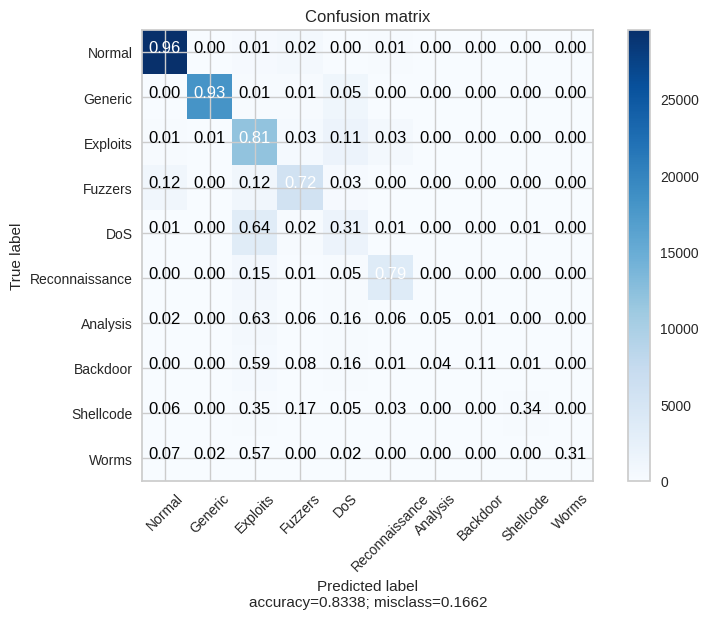

In [21]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod1, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod1, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['1']=acc

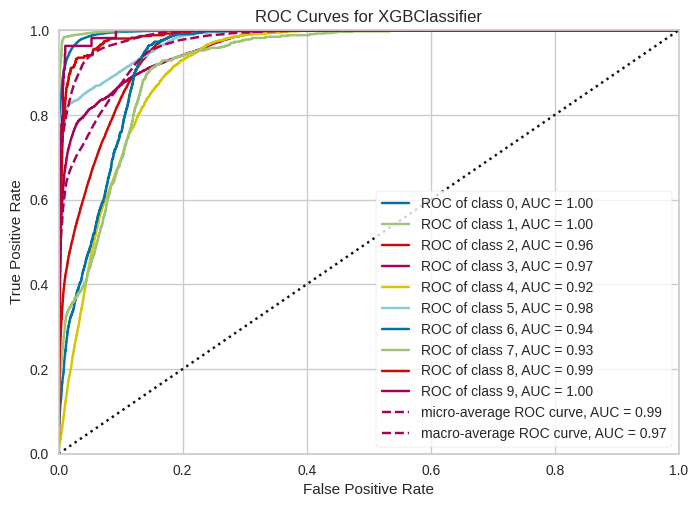

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [22]:
plot_ROC_curve(xgb2, X_train_mod1, y_multi_train, X_test, y_multi_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.7660 - accuracy: 0.7205
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.

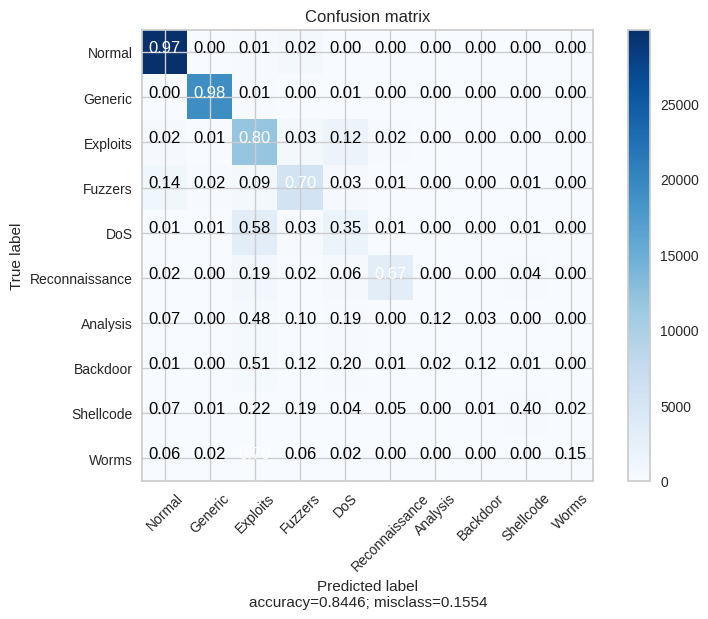

In [23]:
from keras import metrics
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod1,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod1,y_multi_train)[1]))
scores = model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['1']=scores[1]
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [25]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = sklearn.metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30685
           1       0.98      0.98      0.98     19493
           2       0.67      0.80      0.73     14798
           3       0.78      0.70      0.74      7903
           4       0.41      0.35      0.38      5312
           5       0.89      0.67      0.76      4653
           6       0.59      0.12      0.20       850
           7       0.41      0.12      0.18       771
           8       0.33      0.40      0.36       509
           9       0.13      0.15      0.14        54

    accuracy                           0.84     85028
   macro avg       0.61      0.53      0.54     85028
weighted avg       0.84      0.84      0.84     85028



ROC AUC score: 0.969366791502513


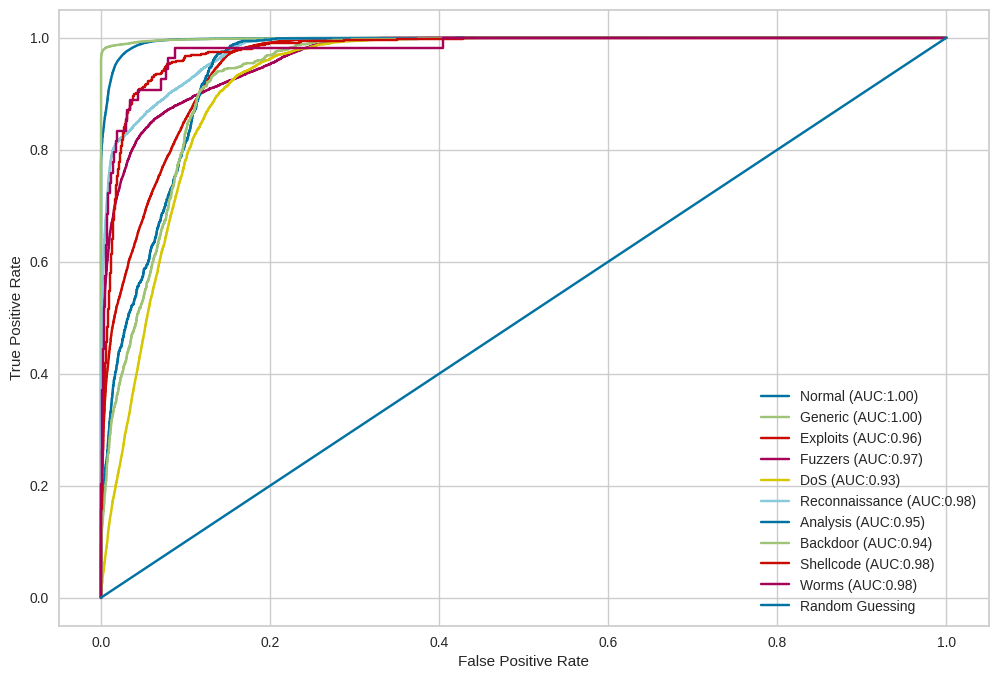

In [26]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
from sklearn.preprocessing import LabelBinarizer

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)

    for (idx, c_label) in enumerate(attack_cat):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 2

In [27]:
noise2 = 2
X_train_mod2 = modify_dataset(X_train, variables_to_poison, noise2)

X_train_mod2

array([[ 0.59684299, -0.20930296,  0.5065376 , ...,  1.00709538,
        -2.0362951 , -0.11941291],
       [-0.36703788, -0.09291996,  4.63822592, ..., -1.84438914,
        -0.50596085, -0.11941291],
       [-0.95475965, -0.20623564, -0.18250845, ..., -1.46187188,
         5.47497098, -0.11941291],
       ...,
       [-0.04595536, -0.20930296, -3.34268929, ...,  4.00653896,
         1.17501158, -0.11941291],
       [ 1.1713472 , -0.20930296, -2.70947644, ...,  3.85768685,
         4.12865502, -0.11941291],
       [ 1.32109174, -0.1171253 ,  3.6758596 , ..., -1.51804715,
        -3.69900385, -0.11941291]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8922002163993038
score on train: 0.8913282743439727
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     30685
           1       0.88      0.97      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



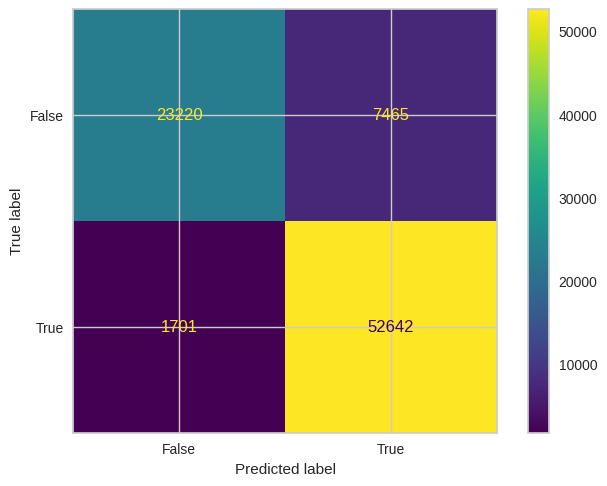

In [28]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod2, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod2, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['2']=acc

AUC: 0.9543


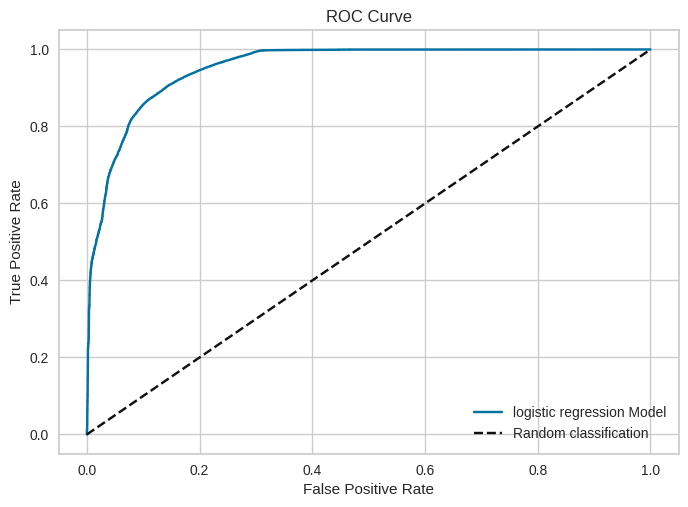

In [29]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-30-7c4992ce0511>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod2, y_train)


score on test: 0.9386790233805334
score on train: 0.9464403637838151
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     30685
           1       0.94      0.96      0.95     54343

    accuracy                           0.94     85028
   macro avg       0.94      0.93      0.93     85028
weighted avg       0.94      0.94      0.94     85028



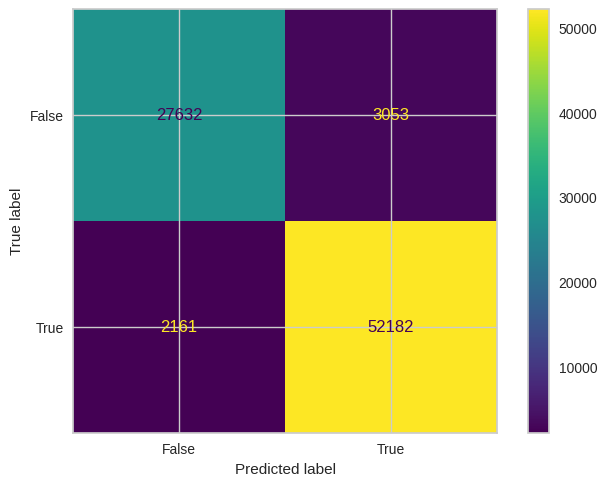

In [30]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod2, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod2, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['2']=acc

AUC: 0.9827


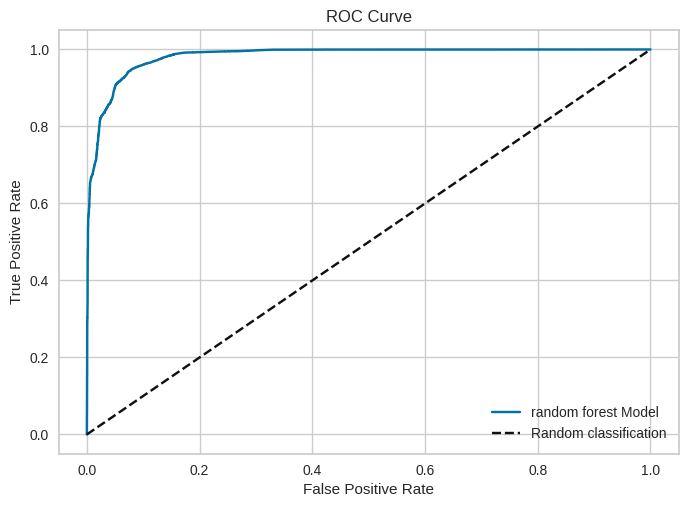

In [31]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9709037023098274
score on train: 0.9922724902971674
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30685
           1       0.97      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



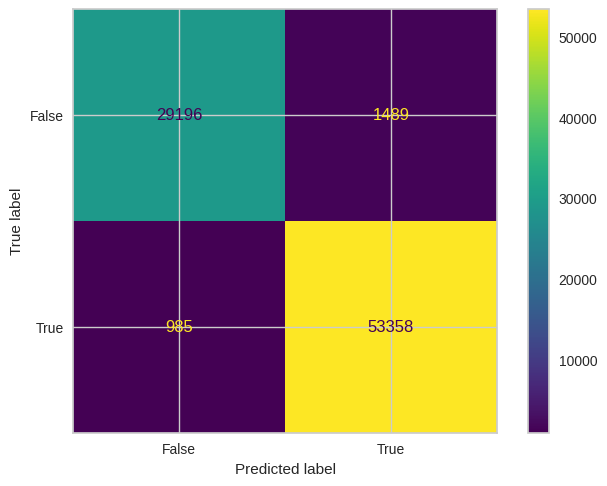

In [32]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod2, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod2, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['2']=acc

AUC: 0.9968


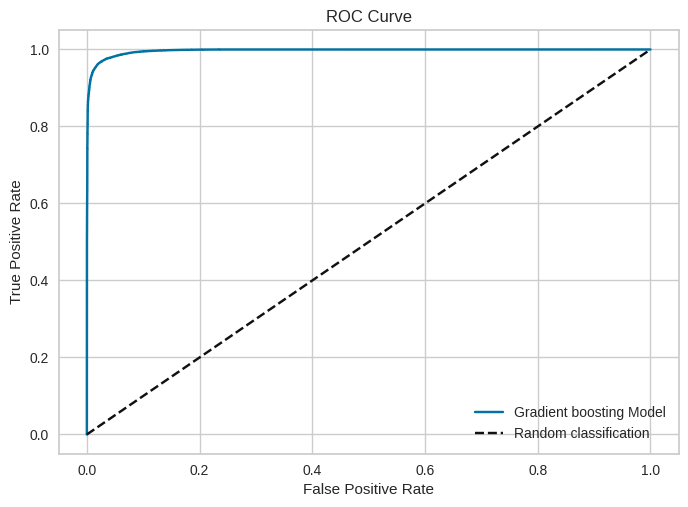

In [33]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2247 - accuracy: 0.8971
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1786 - accuracy: 0.9188
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1590 - accuracy: 0.9275
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1384 - accuracy: 0.9381
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1161 - accuracy: 0.9500
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1012 - accuracy: 0.9572
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0940 - accuracy: 0.9598
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0887 - accuracy: 0.9623
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0859 - accuracy: 0.9641
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

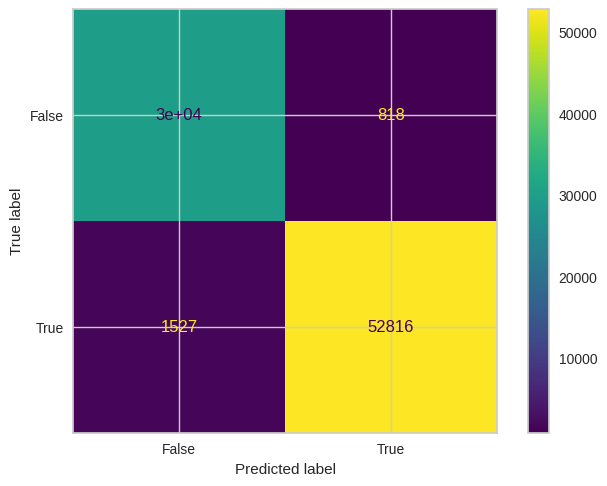

In [34]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod2, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod2,y_train)[1]))

scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['2']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [35]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30685
           1       0.98      0.97      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



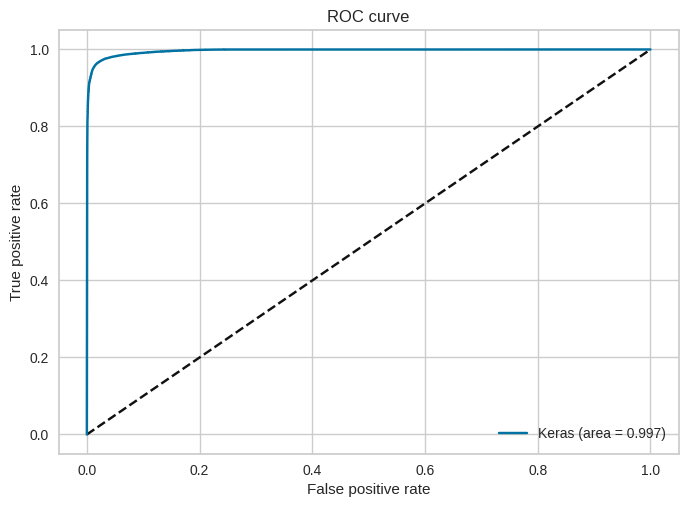

In [36]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.7510467140236158
score on train: 0.8353878236691189


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93     30685
           1       1.00      0.81      0.89     19493
           2       0.52      0.77      0.62     14798
           3       0.63      0.59      0.61      7903
           4       0.36      0.16      0.22      5312
           5       0.76      0.40      0.52      4653
           6       0.52      0.06      0.12       850
           7       0.01      0.02      0.01       771
           8       0.22      0.01      0.02       509
           9       0.00      0.00      0.00        54

    accuracy                           0.75     85028
   macro avg       0.49      0.38      0.39     85028
weighted avg       0.78      0.75      0.75     85028



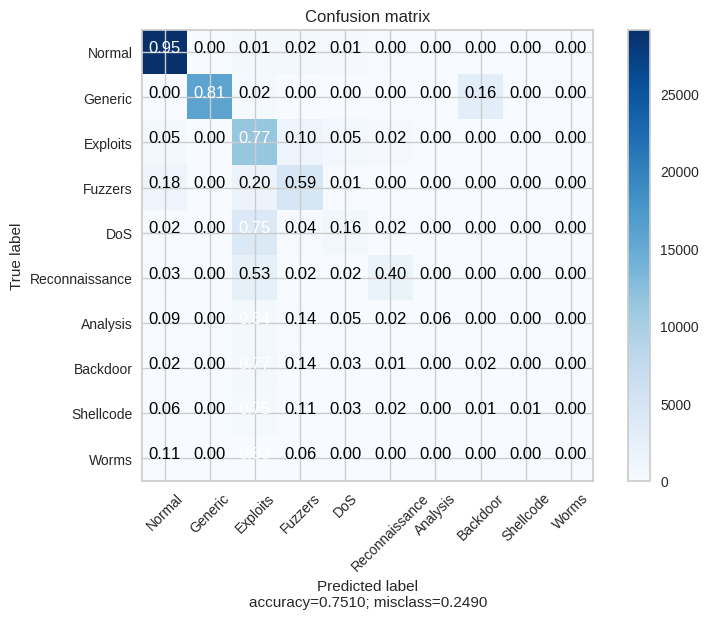

In [37]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod2, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod2, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['2']=acc

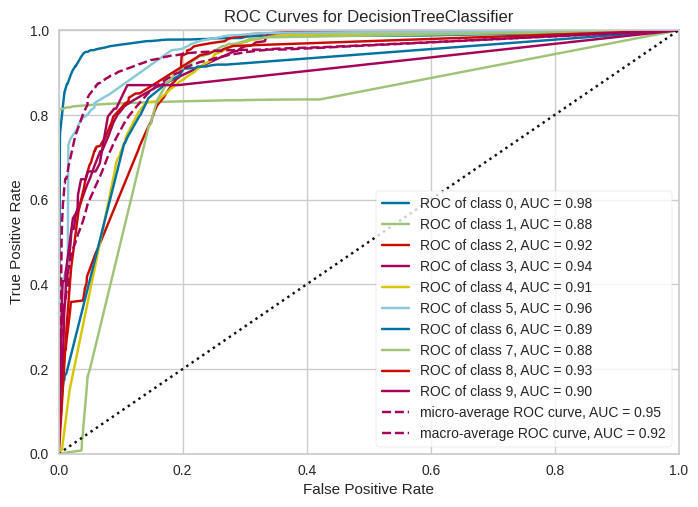

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [38]:
plot_ROC_curve(dtree1, X_train_mod2, y_multi_train, X_test, y_multi_test)

<ipython-input-39-63dc6513c11b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod2, y_multi_train)


score on test: 0.7851884085242509
score on train: 0.814730927417019
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     30685
           1       1.00      0.97      0.98     19493
           2       0.54      0.93      0.69     14798
           3       0.78      0.24      0.36      7903
           4       0.72      0.01      0.02      5312
           5       0.91      0.53      0.67      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.79     85028
   macro avg       0.48      0.36      0.36     85028
weighted avg       0.79      0.79      0.74     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


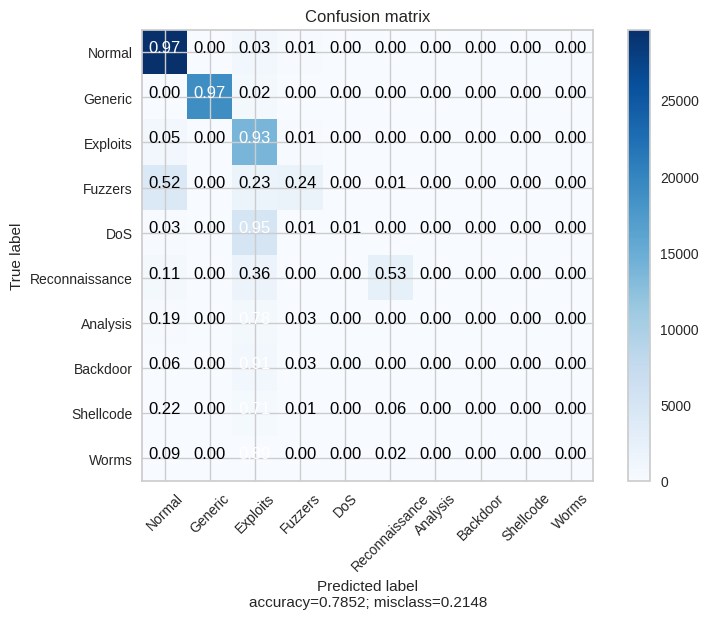

In [39]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod2, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod2, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['2']=acc

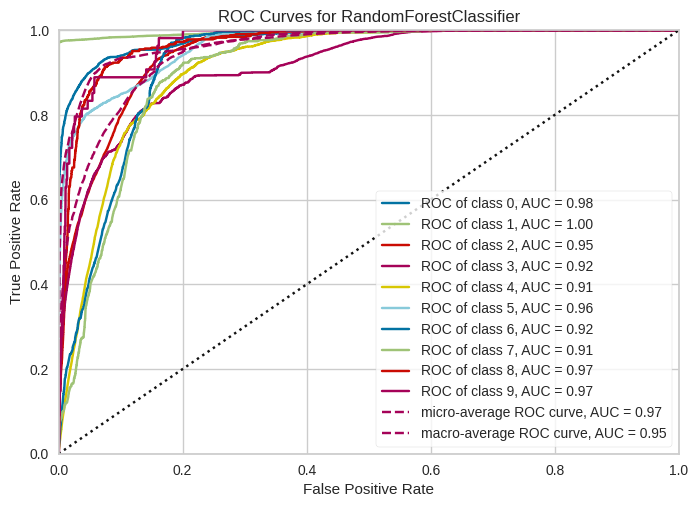

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [40]:
plot_ROC_curve(rf2, X_train_mod2, y_multi_train, X_test, y_multi_test)

score on test: 0.8310791739191795
score on train: 0.9082083067832938
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     30685
           1       1.00      0.90      0.95     19493
           2       0.63      0.82      0.71     14798
           3       0.73      0.70      0.72      7903
           4       0.37      0.35      0.36      5312
           5       0.88      0.76      0.82      4653
           6       0.73      0.04      0.07       850
           7       0.76      0.12      0.20       771
           8       0.56      0.36      0.44       509
           9       0.48      0.28      0.35        54

    accuracy                           0.83     85028
   macro avg       0.71      0.53      0.56     85028
weighted avg       0.84      0.83      0.83     85028



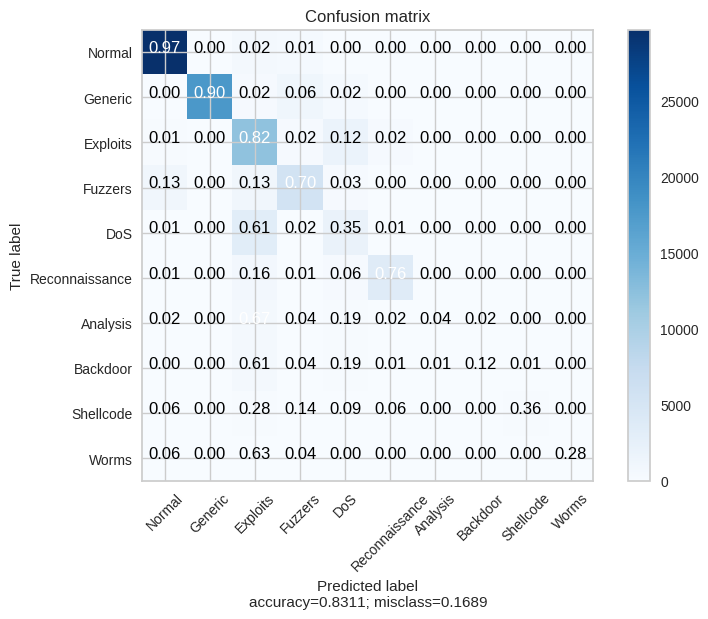

In [41]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod2, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod2, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['2']=acc

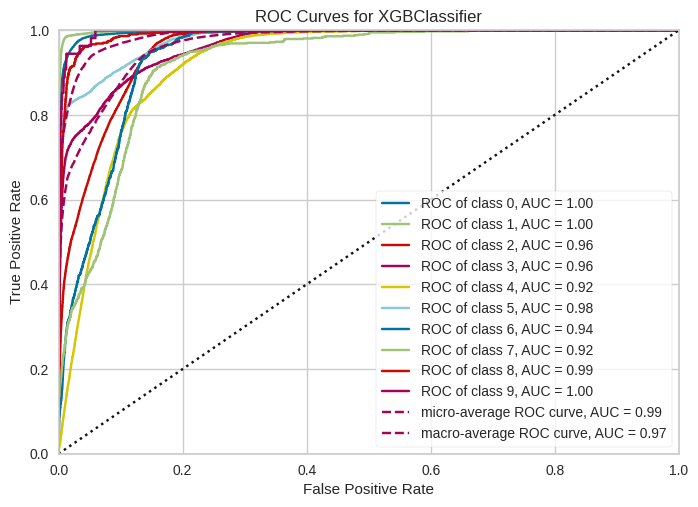

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [42]:
plot_ROC_curve(xgb2, X_train_mod2, y_multi_train, X_test, y_multi_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               5504      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.8151 - accuracy: 0.7039
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.

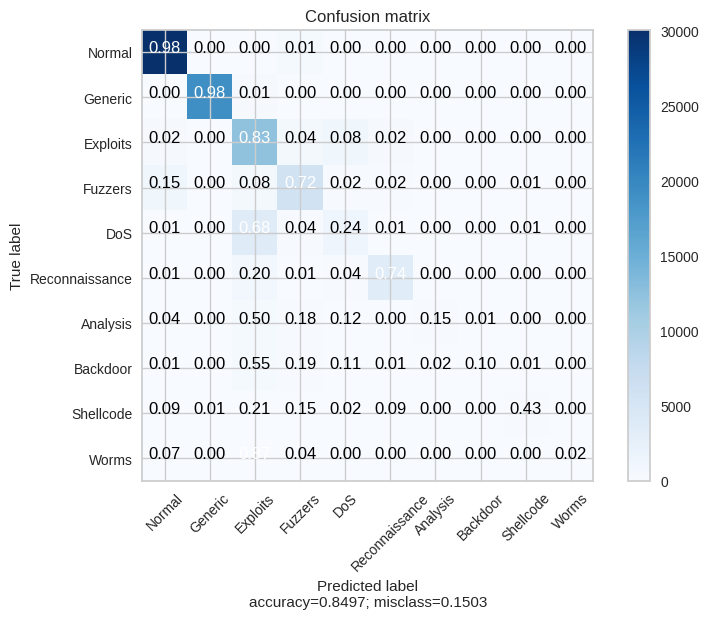

In [43]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod2,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['2']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod2,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [44]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     30685
           1       0.99      0.98      0.99     19493
           2       0.65      0.83      0.73     14798
           3       0.77      0.72      0.74      7903
           4       0.41      0.24      0.30      5312
           5       0.85      0.74      0.79      4653
           6       0.58      0.15      0.23       850
           7       0.58      0.10      0.18       771
           8       0.50      0.43      0.46       509
           9       0.05      0.02      0.03        54

    accuracy                           0.85     85028
   macro avg       0.63      0.52      0.54     85028
weighted avg       0.84      0.85      0.84     85028



ROC AUC score: 0.9693911047622505


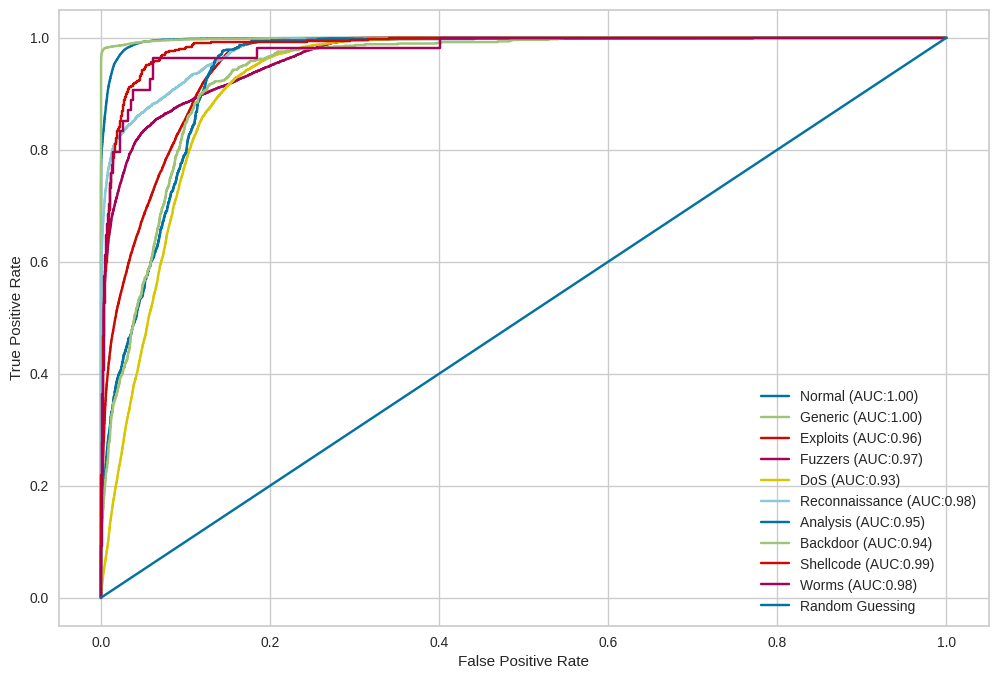

In [45]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 3

In [46]:
noise3 = 3
X_train_mod3 = modify_dataset(X_train, variables_to_poison, noise3)

X_train_mod3

array([[ 0.59684299, -0.20930296, -3.5835691 , ...,  0.58198952,
        -5.47164355, -0.11941291],
       [-0.36703788, -0.09291996,  4.43626645, ...,  1.29718252,
        -2.90093627, -0.11941291],
       [-0.95475965, -0.20623564, -3.01336386, ..., -3.55822313,
         1.89263879, -0.11941291],
       ...,
       [-0.04595536, -0.20930296, -0.34691908, ...,  1.20076332,
        -3.14348741, -0.11941291],
       [ 1.1713472 , -0.20930296,  1.04199133, ...,  6.70589978,
        -3.05158486, -0.11941291],
       [ 1.32109174, -0.1171253 , -0.35289952, ..., -2.63992985,
        -1.40250297, -0.11941291]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8926588888366185
score on train: 0.891919133406708
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     30685
           1       0.88      0.97      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.90      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



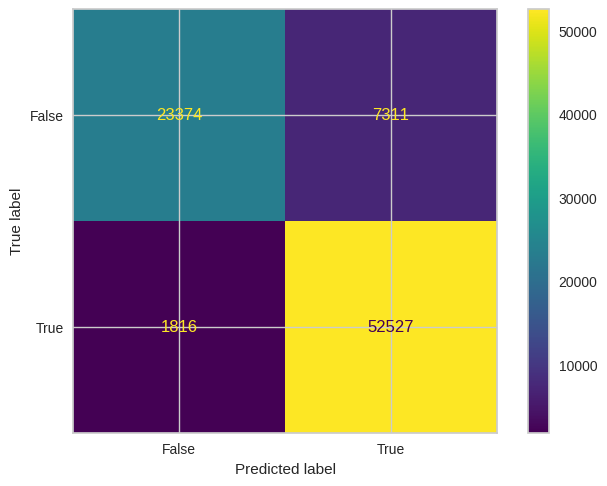

In [47]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod3, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod3, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['3']=acc

AUC: 0.9538


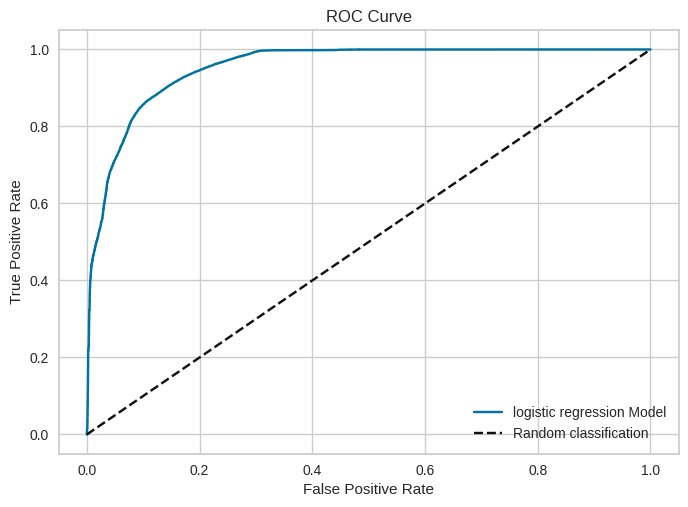

In [48]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-49-1b3f14efa2b7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod3, y_train)


score on test: 0.9446888083925296
score on train: 0.9466489022765452
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     30685
           1       0.95      0.97      0.96     54343

    accuracy                           0.94     85028
   macro avg       0.94      0.94      0.94     85028
weighted avg       0.94      0.94      0.94     85028



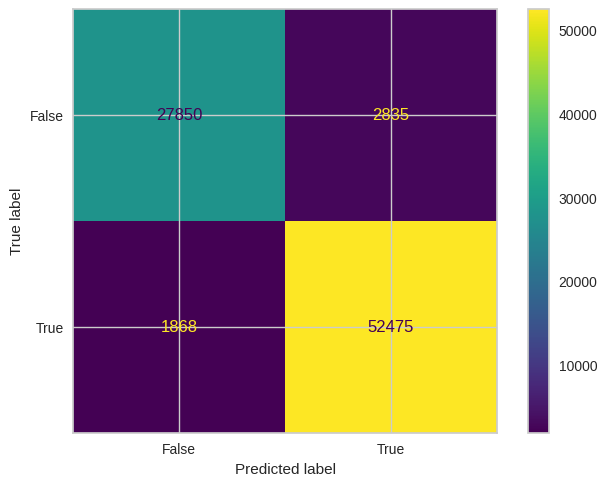

In [49]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod3, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod3, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['3']=acc

AUC: 0.9867


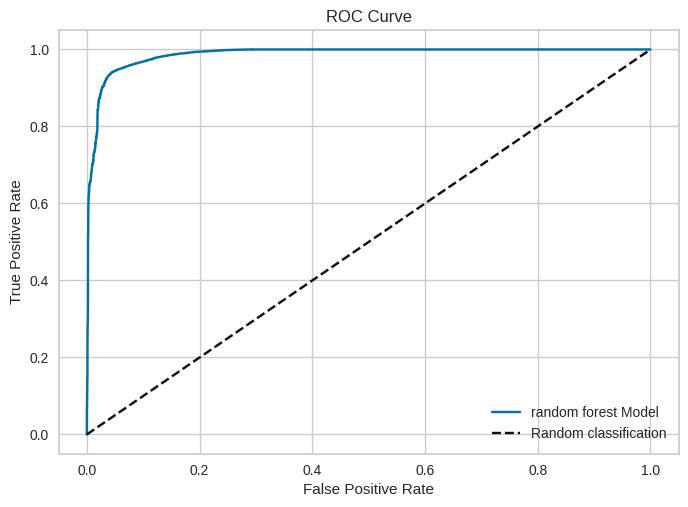

In [50]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9696805758103213
score on train: 0.9914383363262469
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30685
           1       0.97      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



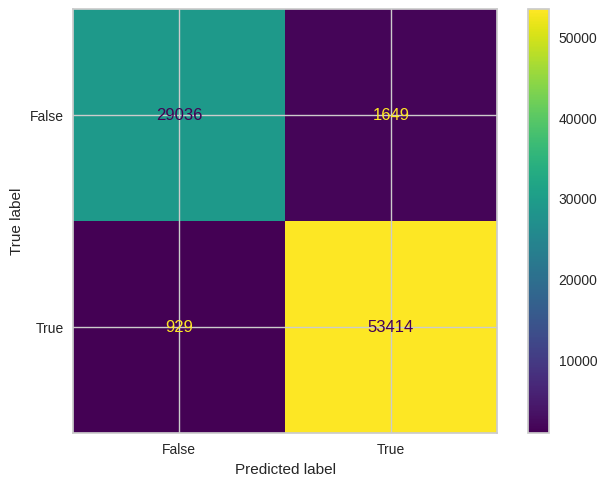

In [51]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod3, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod3, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['3']=acc

AUC: 0.9965


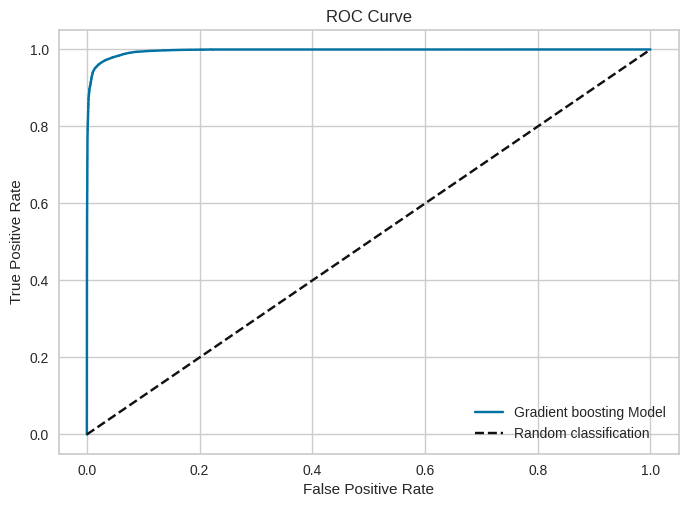

In [52]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2425 - accuracy: 0.8893
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1863 - accuracy: 0.9137
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1673 - accuracy: 0.9239
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1422 - accuracy: 0.9374
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1201 - accuracy: 0.9487
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1067 - accuracy: 0.9547
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0997 - accuracy: 0.9575
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0944 - accuracy: 0.9601
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0901 - accuracy: 0.9623
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

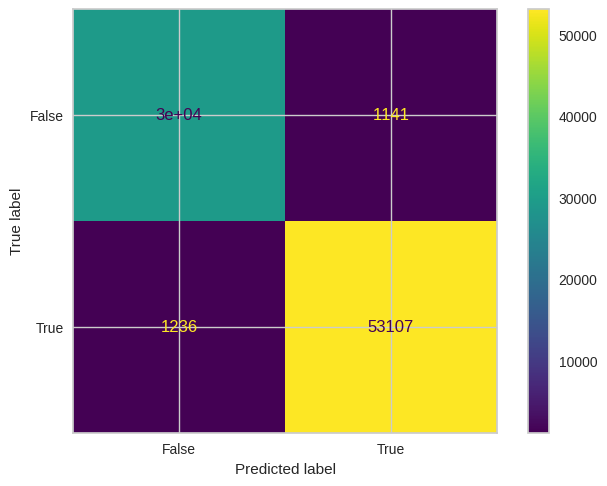

In [53]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod3, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod3,y_train)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['3']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [54]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



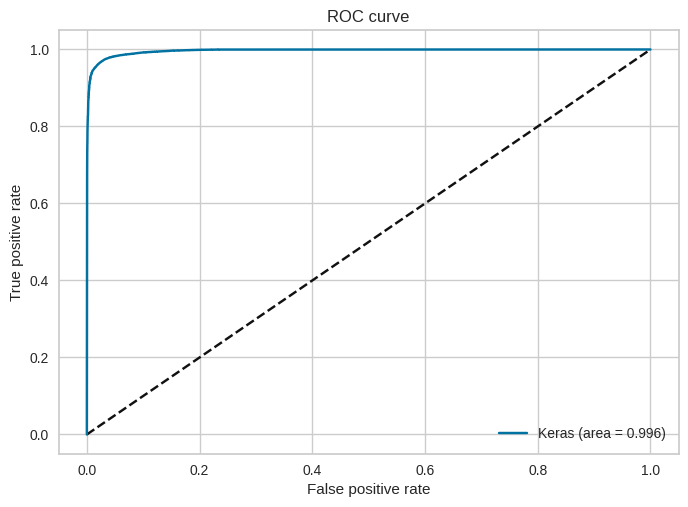

In [55]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.8060403631744837
score on train: 0.8351966633841164


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     30685
           1       0.99      0.97      0.98     19493
           2       0.56      0.78      0.65     14798
           3       0.63      0.59      0.61      7903
           4       0.41      0.15      0.22      5312
           5       0.85      0.69      0.76      4653
           6       0.53      0.06      0.12       850
           7       0.20      0.01      0.03       771
           8       0.21      0.01      0.02       509
           9       0.00      0.00      0.00        54

    accuracy                           0.81     85028
   macro avg       0.53      0.42      0.43     85028
weighted avg       0.80      0.81      0.79     85028



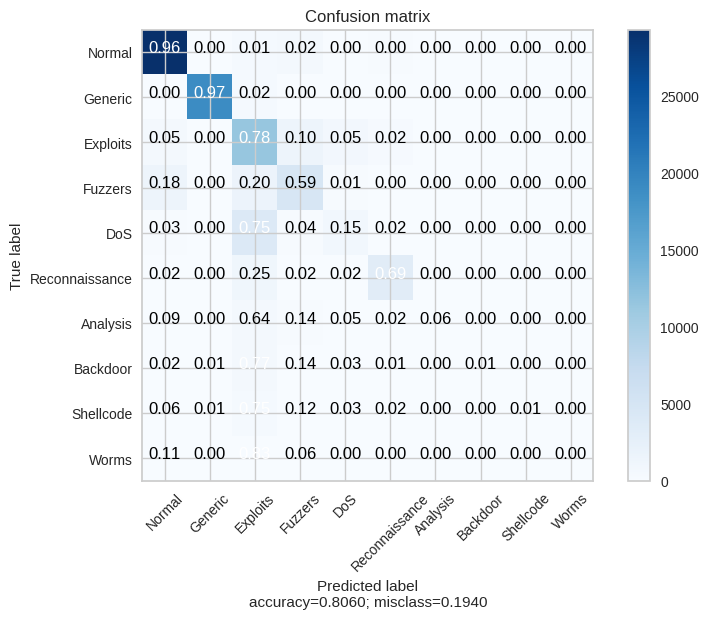

In [56]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod3, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod3, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['3']=acc

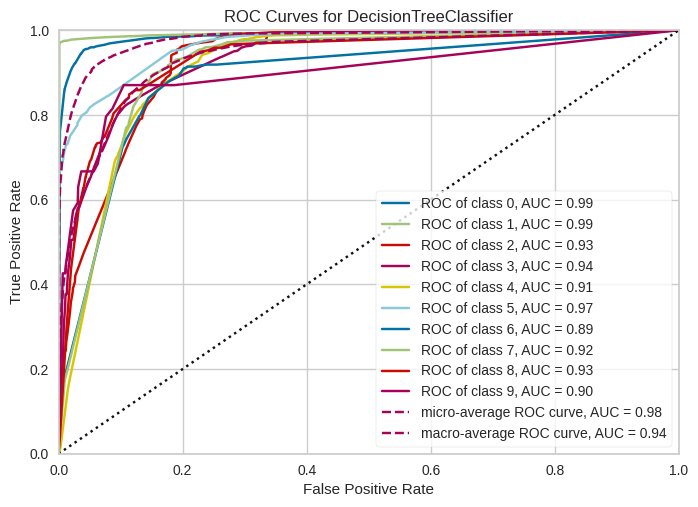

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [57]:
plot_ROC_curve(dtree1, X_train_mod3, y_multi_train, X_test, y_multi_test)

<ipython-input-58-c801b2656da6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod3, y_multi_train)


score on test: 0.7905160652961377
score on train: 0.8165614319643167
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     30685
           1       1.00      0.97      0.99     19493
           2       0.55      0.91      0.68     14798
           3       0.78      0.40      0.53      7903
           4       0.47      0.07      0.13      5312
           5       0.92      0.29      0.44      4653
           6       0.00      0.00      0.00       850
           7       1.00      0.00      0.01       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.79     85028
   macro avg       0.56      0.36      0.37     85028
weighted avg       0.79      0.79      0.75     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


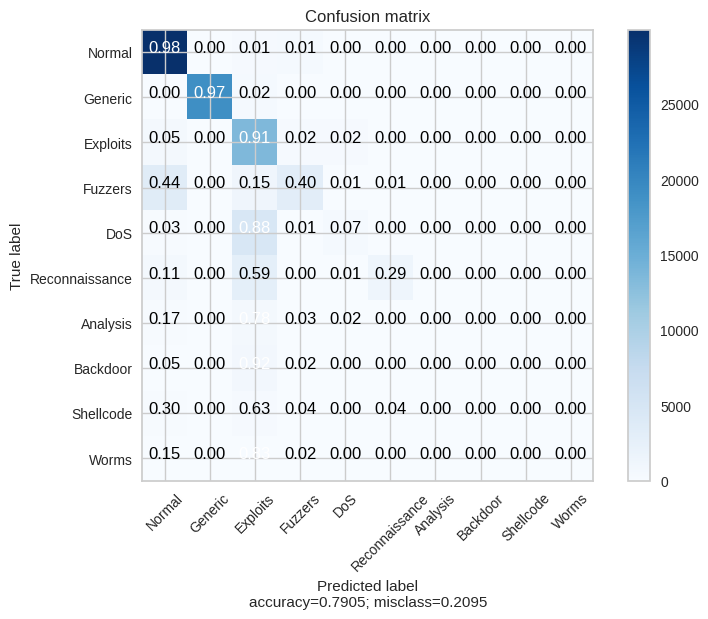

In [58]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod3, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod3, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['3']=acc

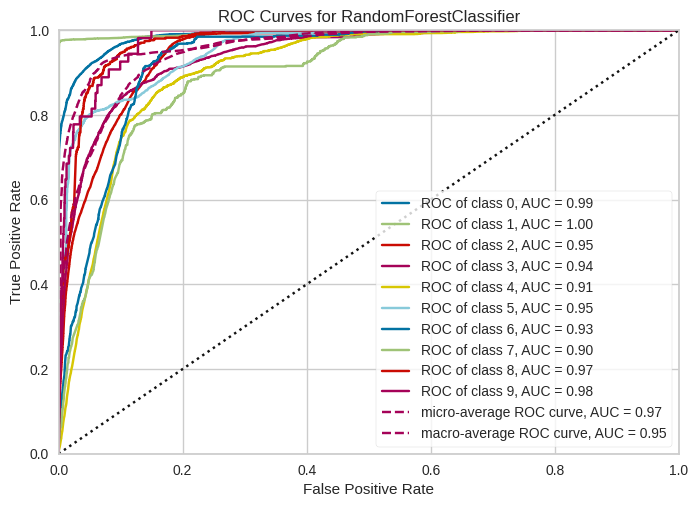

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [59]:
plot_ROC_curve(rf2, X_train_mod3, y_multi_train, X_test, y_multi_test)

score on test: 0.8449687161876088
score on train: 0.9060302380814459
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30685
           1       1.00      0.97      0.98     19493
           2       0.62      0.85      0.72     14798
           3       0.81      0.73      0.77      7903
           4       0.40      0.27      0.32      5312
           5       0.88      0.77      0.82      4653
           6       0.55      0.06      0.11       850
           7       0.80      0.06      0.11       771
           8       0.53      0.31      0.39       509
           9       0.44      0.26      0.33        54

    accuracy                           0.84     85028
   macro avg       0.70      0.52      0.55     85028
weighted avg       0.85      0.84      0.84     85028



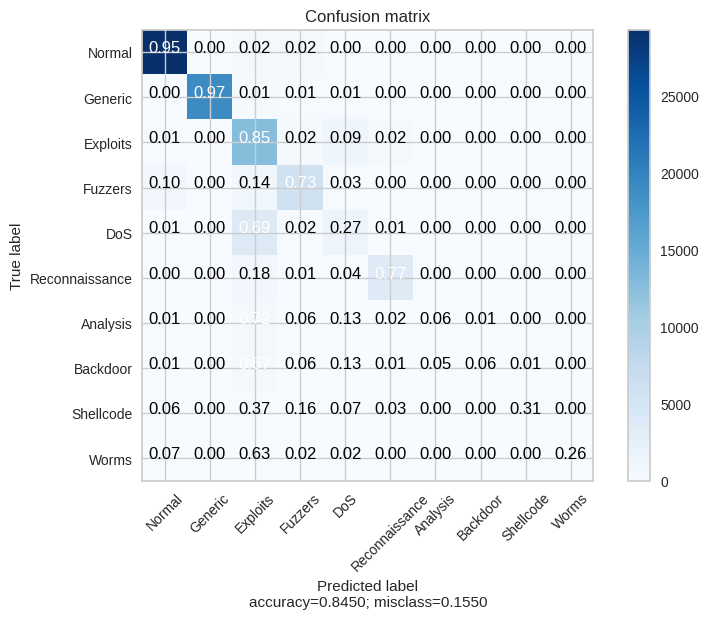

In [60]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod3, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod3, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['3']=acc

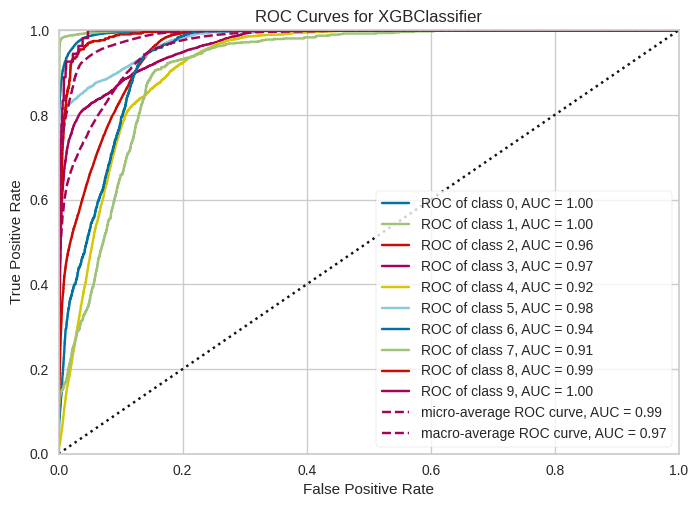

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [61]:
plot_ROC_curve(xgb2, X_train_mod3, y_multi_train, X_test, y_multi_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               5504      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.8486 - accuracy: 0.6902
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.

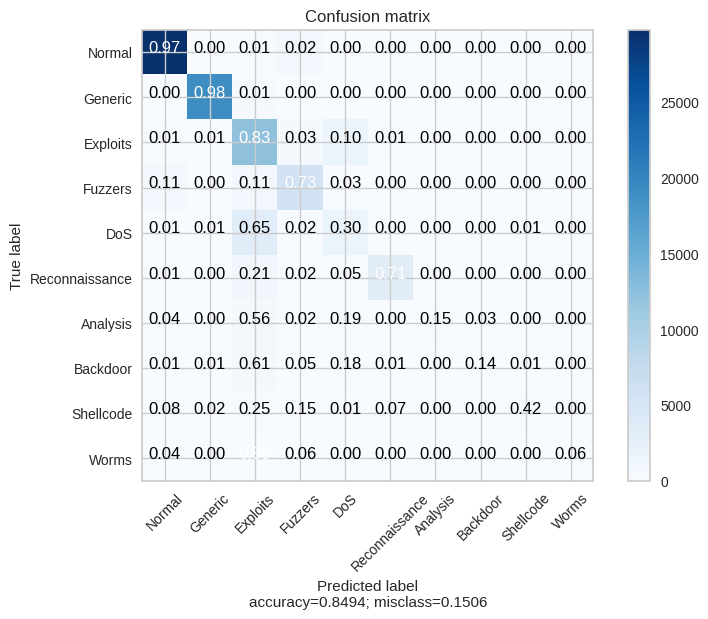

In [62]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod3,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['3']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod3,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [63]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     30685
           1       0.99      0.98      0.98     19493
           2       0.64      0.83      0.72     14798
           3       0.80      0.73      0.76      7903
           4       0.40      0.30      0.34      5312
           5       0.92      0.71      0.80      4653
           6       0.59      0.15      0.24       850
           7       0.62      0.14      0.23       771
           8       0.51      0.42      0.46       509
           9       0.14      0.06      0.08        54

    accuracy                           0.85     85028
   macro avg       0.66      0.53      0.56     85028
weighted avg       0.85      0.85      0.84     85028



ROC AUC score: 0.968749619320864


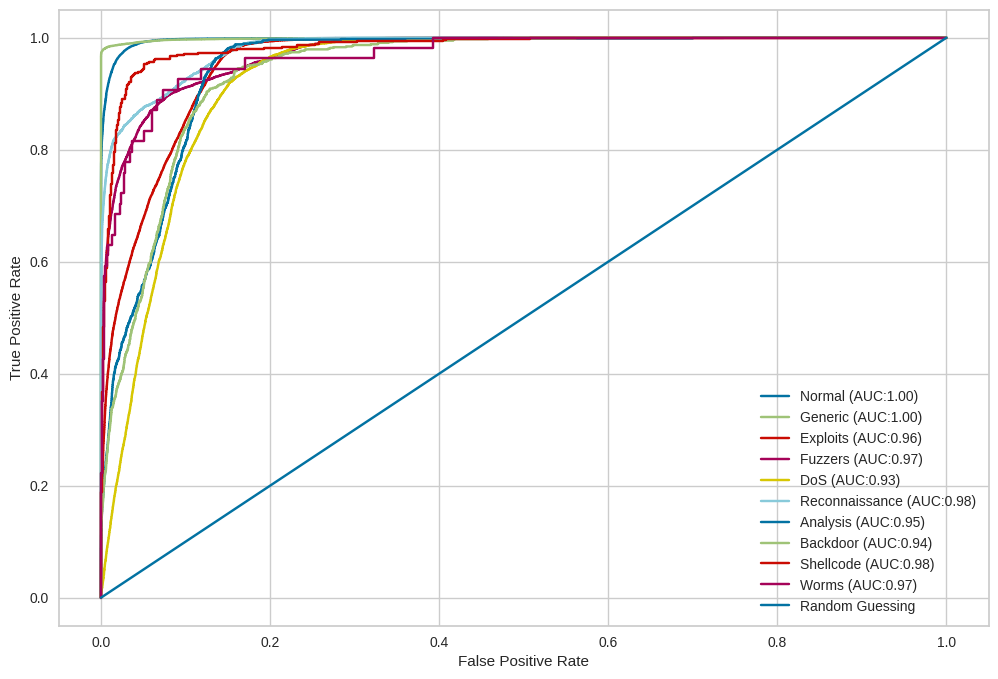

In [64]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 4

In [65]:
noise4 = 4
X_train_mod4 = modify_dataset(X_train, variables_to_poison, noise4)

X_train_mod4

array([[ 0.59684299, -0.20930296,  2.4673984 , ..., -3.51672825,
        -1.71135857, -0.11941291],
       [-0.36703788, -0.09291996,  6.98730374, ..., -3.33522053,
        -9.70035893, -0.11941291],
       [-0.95475965, -0.20623564,  0.67528757, ..., -7.10426356,
        -4.41007169, -0.11941291],
       ...,
       [-0.04595536, -0.20930296,  3.35262204, ...,  1.85971274,
         7.39041427, -0.11941291],
       [ 1.1713472 , -0.20930296,  5.31655553, ...,  7.5935778 ,
         1.93386124, -0.11941291],
       [ 1.32109174, -0.1171253 , -7.45902555, ..., -1.05194516,
         1.78254593, -0.11941291]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8938937761678506
score on train: 0.8925099924694433
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     30685
           1       0.88      0.97      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.90      0.87      0.88     85028
weighted avg       0.90      0.89      0.89     85028



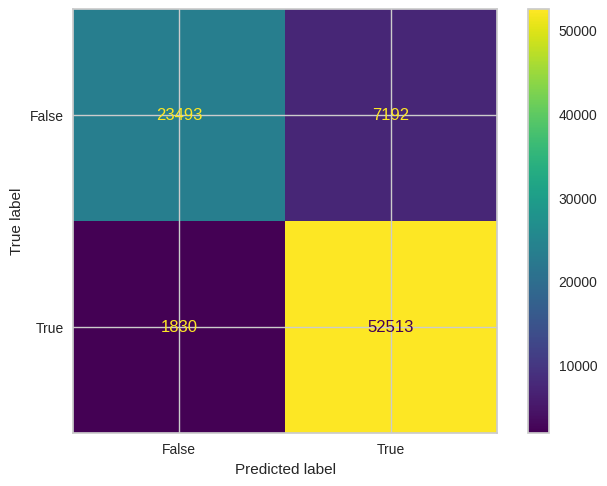

In [66]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod4, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod4, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['4']=acc

AUC: 0.9536


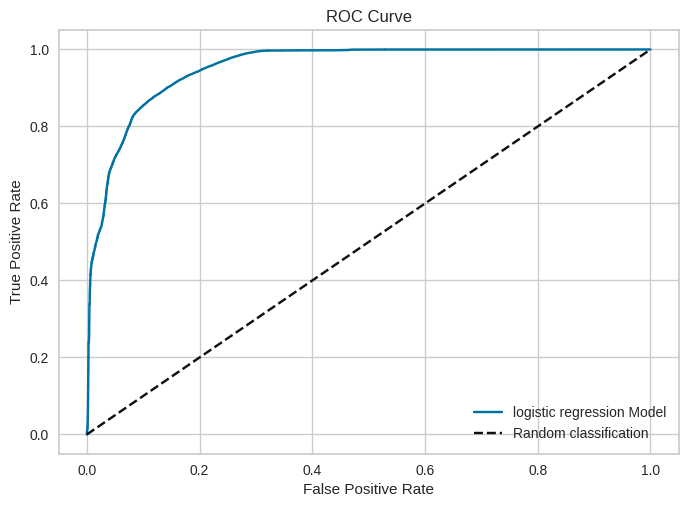

In [67]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-68-e1f13e046cab>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod4, y_train)


score on test: 0.9424189678694077
score on train: 0.949608990326131
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     30685
           1       0.95      0.96      0.96     54343

    accuracy                           0.94     85028
   macro avg       0.94      0.94      0.94     85028
weighted avg       0.94      0.94      0.94     85028



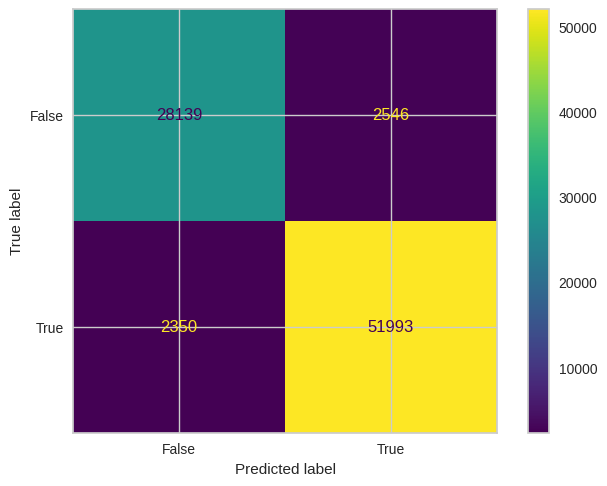

In [68]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod4, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod4, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['4']=acc

AUC: 0.9835


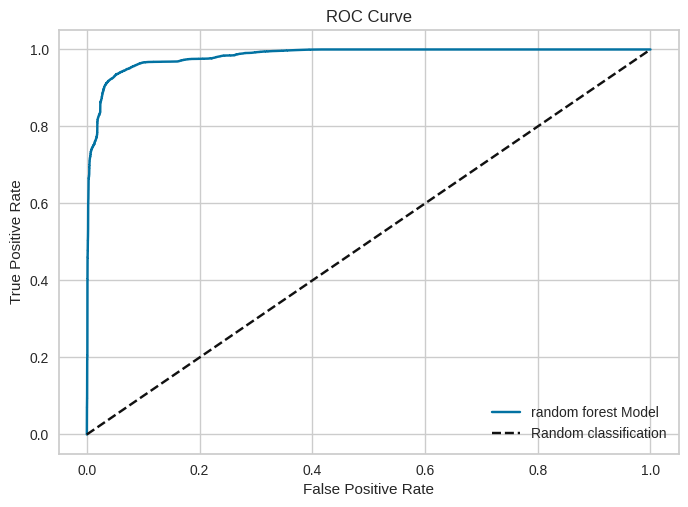

In [69]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9707272898339371
score on train: 0.9922029774662573
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30685
           1       0.97      0.99      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



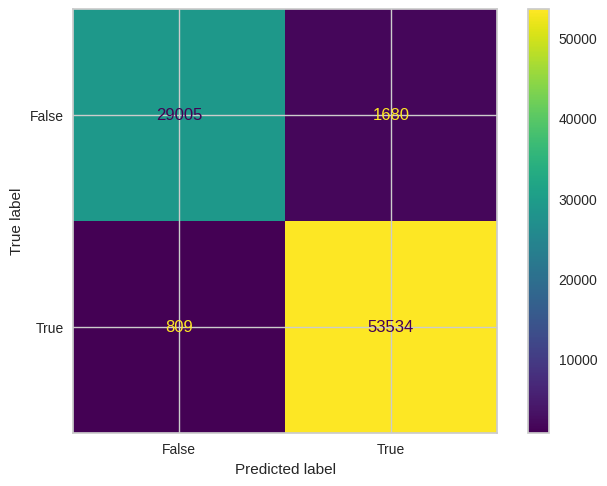

In [70]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod4, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod4, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['4']=acc

AUC: 0.9967


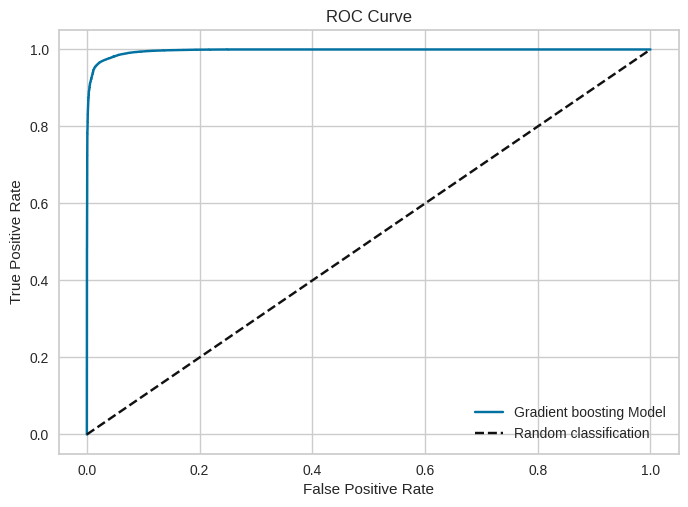

In [71]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.8838
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1916 - accuracy: 0.9120
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1774 - accuracy: 0.9189
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1672 - accuracy: 0.9242
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1498 - accuracy: 0.9310
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1395 - accuracy: 0.9372
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1293 - accuracy: 0.9424
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1133 - accuracy: 0.9512
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1007 - accuracy: 0.9572
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

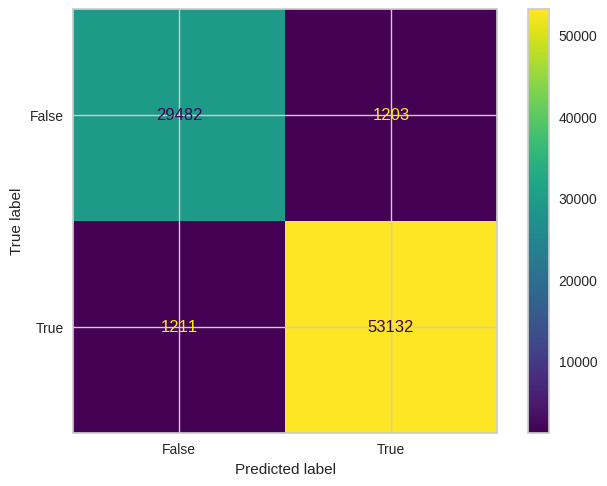

In [72]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod4, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod4,y_train)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['4']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [73]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



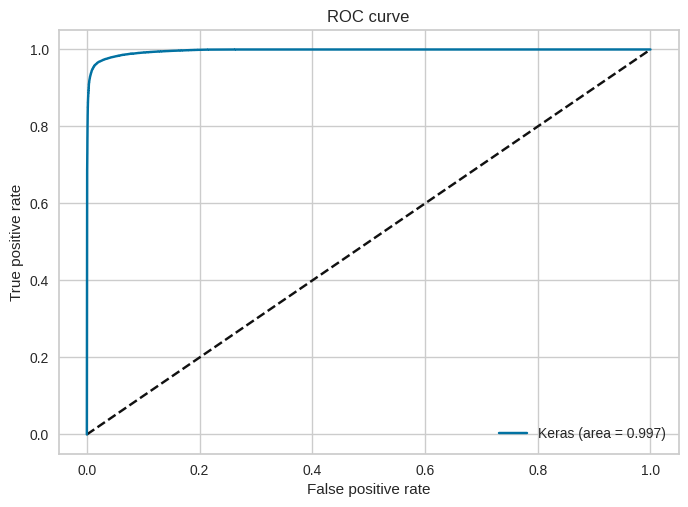

In [74]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.8052053441219363
score on train: 0.8351966633841164


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     30685
           1       1.00      0.97      0.98     19493
           2       0.56      0.77      0.65     14798
           3       0.63      0.59      0.61      7903
           4       0.40      0.15      0.22      5312
           5       0.84      0.69      0.76      4653
           6       0.52      0.06      0.12       850
           7       0.19      0.02      0.04       771
           8       0.21      0.01      0.02       509
           9       0.00      0.00      0.00        54

    accuracy                           0.81     85028
   macro avg       0.53      0.42      0.43     85028
weighted avg       0.79      0.81      0.79     85028



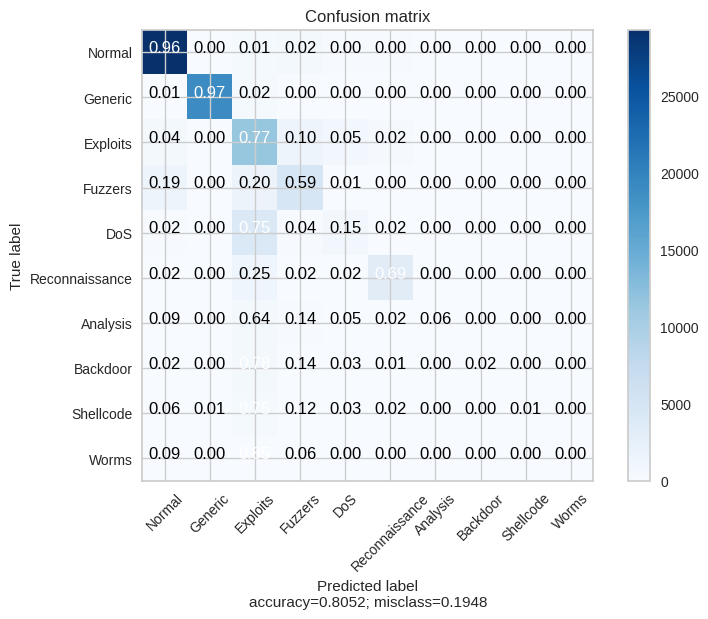

In [75]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod4, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod4, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['4']=acc

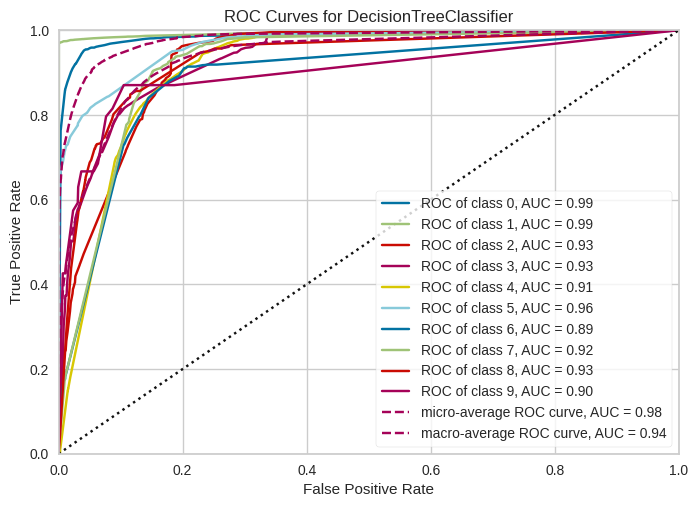

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [76]:
plot_ROC_curve(dtree1, X_train_mod4, y_multi_train, X_test, y_multi_test)

<ipython-input-77-7575b483ca04>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod4, y_multi_train)


score on test: 0.7937855765159713
score on train: 0.8146034872270174
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     30685
           1       1.00      0.97      0.98     19493
           2       0.56      0.94      0.70     14798
           3       0.74      0.37      0.49      7903
           4       0.52      0.01      0.02      5312
           5       0.95      0.48      0.64      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.79     85028
   macro avg       0.46      0.37      0.37     85028
weighted avg       0.78      0.79      0.75     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


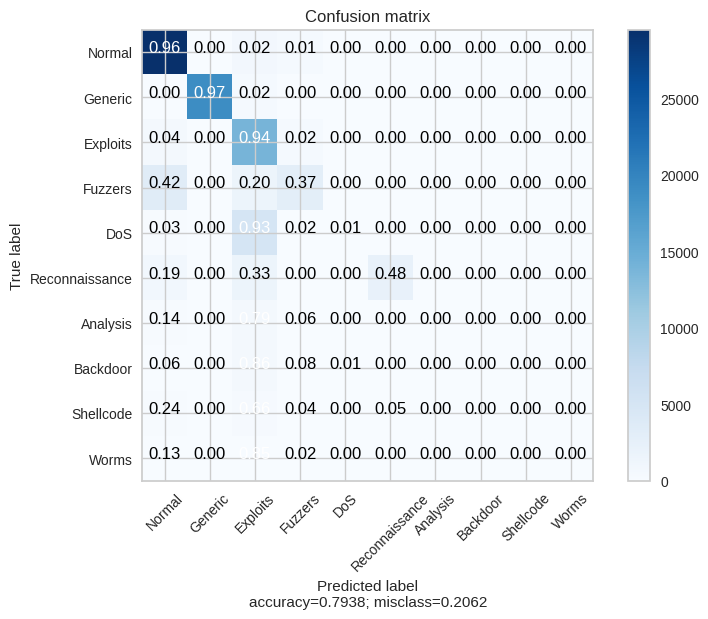

In [77]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod4, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod4, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['4']=acc

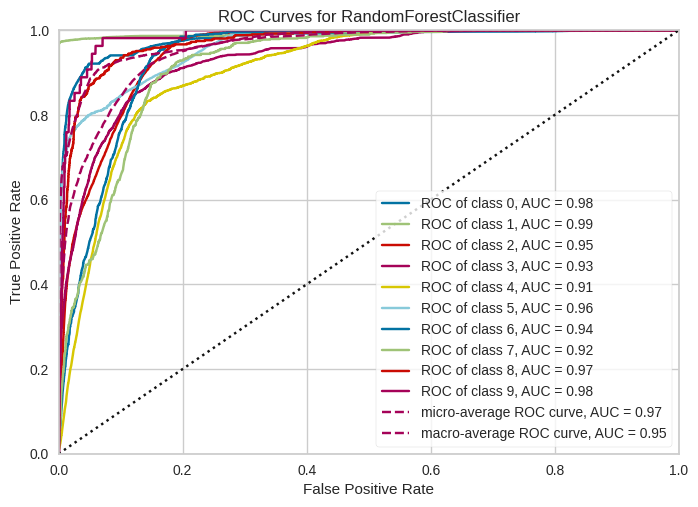

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [78]:
plot_ROC_curve(rf2, X_train_mod4, y_multi_train, X_test, y_multi_test)

score on test: 0.8214588135672954
score on train: 0.907669582343741
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       1.00      0.87      0.93     19493
           2       0.63      0.83      0.72     14798
           3       0.67      0.70      0.68      7903
           4       0.36      0.32      0.34      5312
           5       0.87      0.76      0.81      4653
           6       0.60      0.05      0.10       850
           7       0.71      0.06      0.12       771
           8       0.56      0.26      0.35       509
           9       0.39      0.30      0.34        54

    accuracy                           0.82     85028
   macro avg       0.67      0.51      0.53     85028
weighted avg       0.83      0.82      0.82     85028



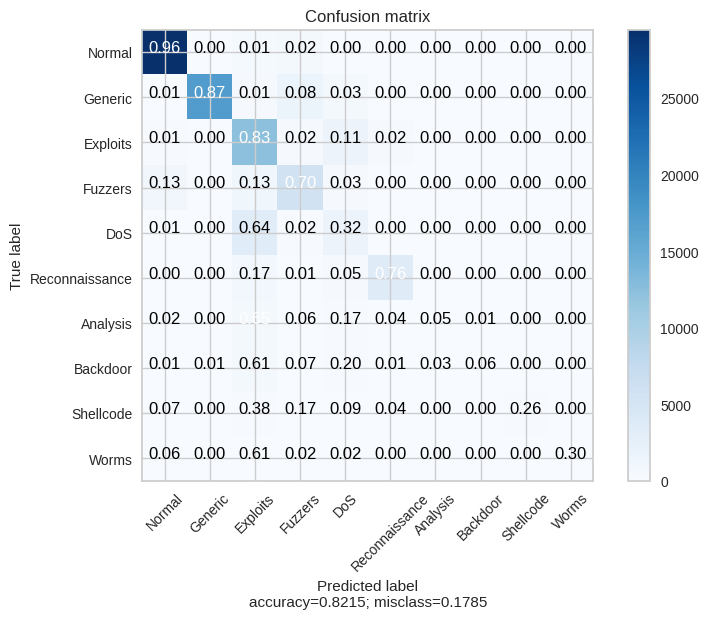

In [79]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod4, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod4, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['4']=acc

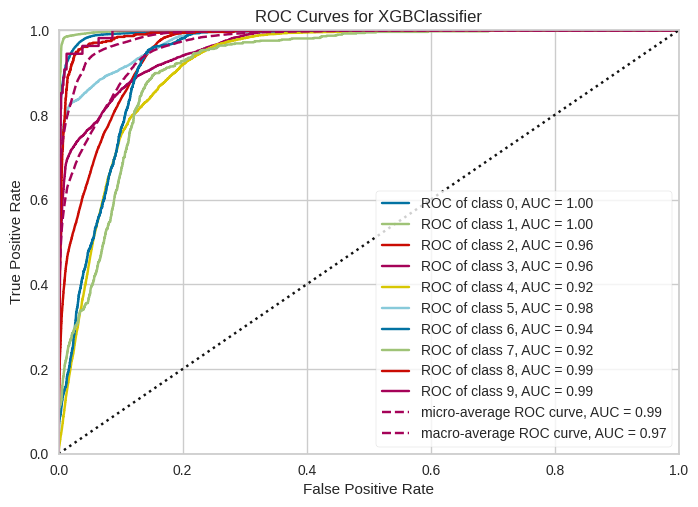

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [80]:
plot_ROC_curve(xgb2, X_train_mod4, y_multi_train, X_test, y_multi_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               5504      
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.8788 - accuracy: 0.6775
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.

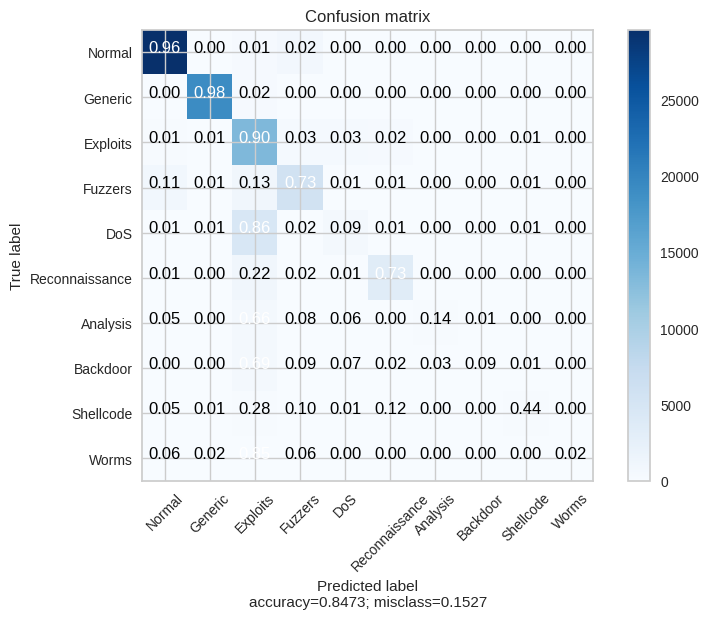

In [81]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod4,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['4']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod4,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [82]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.99      0.98      0.98     19493
           2       0.61      0.90      0.73     14798
           3       0.79      0.73      0.76      7903
           4       0.39      0.09      0.15      5312
           5       0.86      0.73      0.79      4653
           6       0.66      0.14      0.23       850
           7       0.60      0.09      0.16       771
           8       0.46      0.44      0.45       509
           9       0.50      0.02      0.04        54

    accuracy                           0.85     85028
   macro avg       0.68      0.51      0.52     85028
weighted avg       0.84      0.85      0.83     85028



ROC AUC score: 0.9677834318159068


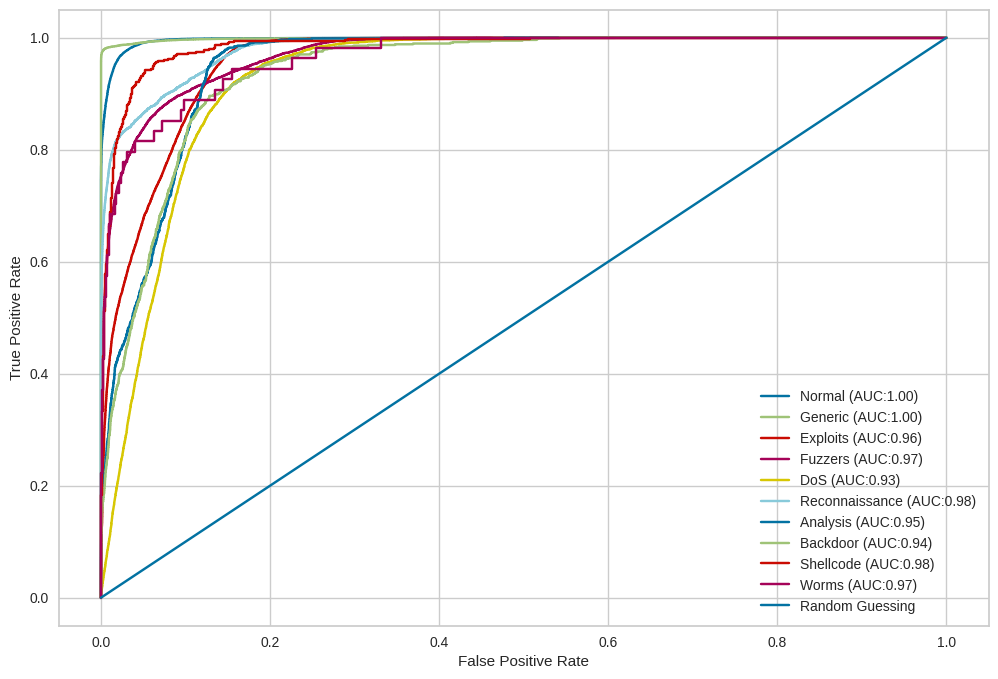

In [83]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 5

In [84]:
noise5 = 5
X_train_mod5 = modify_dataset(X_train, variables_to_poison, noise5)

X_train_mod5

array([[ 0.59684299, -0.20930296,  3.92421906, ..., 13.05377393,
         8.12254996, -0.11941291],
       [-0.36703788, -0.09291996,  2.67008047, ..., -5.59010425,
        -7.02697269, -0.11941291],
       [-0.95475965, -0.20623564, 15.0836642 , ..., -5.24658585,
         1.77212775, -0.11941291],
       ...,
       [-0.04595536, -0.20930296, -7.77855649, ..., -5.7141993 ,
         4.33705188, -0.11941291],
       [ 1.1713472 , -0.20930296,  1.09619112, ..., 12.56282023,
        -0.24137162, -0.11941291],
       [ 1.32109174, -0.1171253 , -4.97061549, ..., -3.45927598,
        -2.88868221, -0.11941291]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8934821470574399
score on train: 0.8923072467126224
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     30685
           1       0.88      0.97      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.90      0.87      0.88     85028
weighted avg       0.90      0.89      0.89     85028



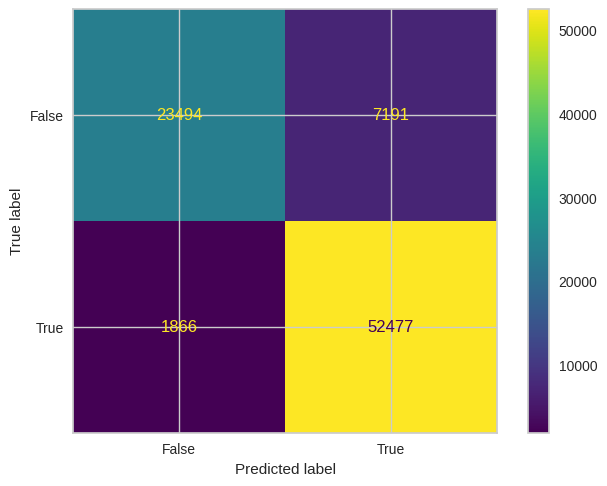

In [85]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod5, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod5, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['5']=acc

AUC: 0.9530


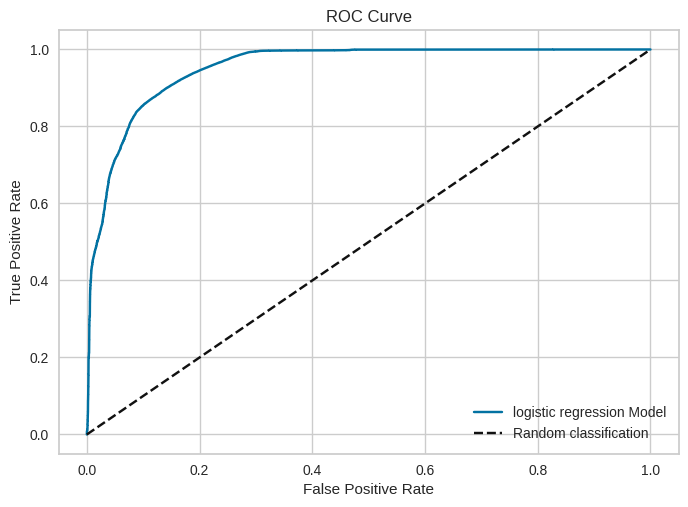

In [86]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-87-9b10e58482f5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod5, y_train)


score on test: 0.9390671308274922
score on train: 0.9497190523084053
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     30685
           1       0.95      0.96      0.95     54343

    accuracy                           0.94     85028
   macro avg       0.94      0.93      0.93     85028
weighted avg       0.94      0.94      0.94     85028



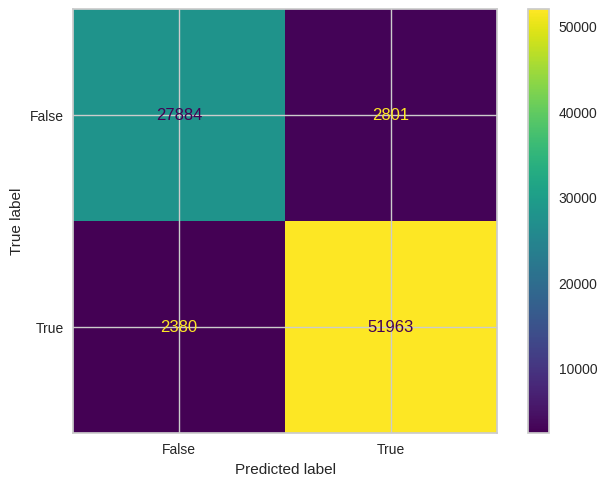

In [87]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod5, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod5, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['5']=acc

AUC: 0.9870


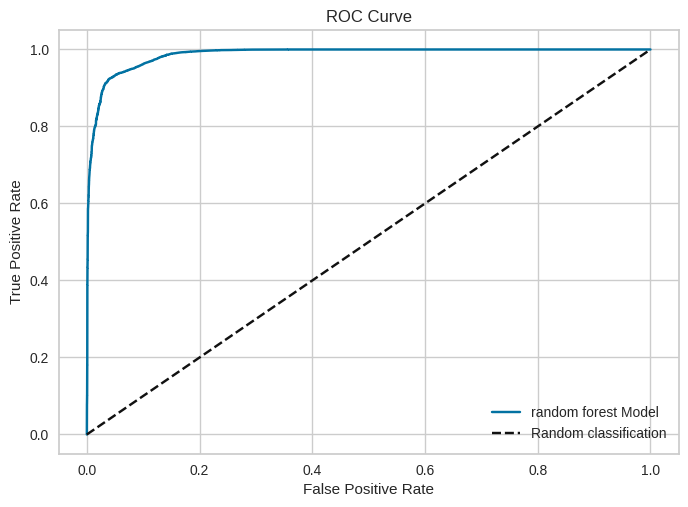

In [88]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9695982499882392
score on train: 0.9918322423680704
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     30685
           1       0.97      0.99      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



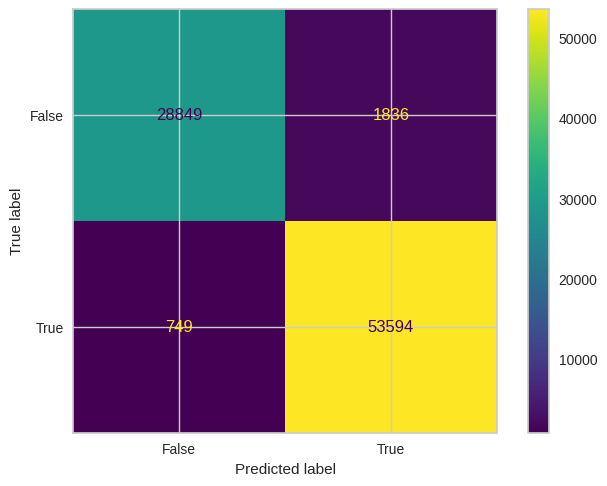

In [89]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod5, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod5, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['5']=acc

AUC: 0.9967


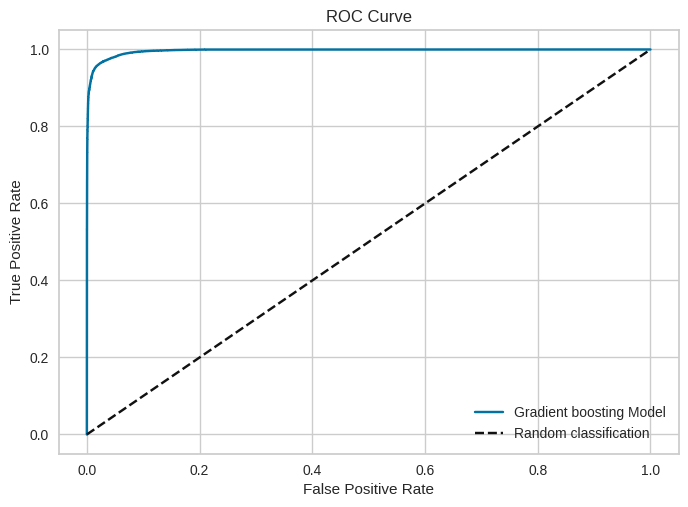

In [90]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.8803
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2013 - accuracy: 0.9083
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1830 - accuracy: 0.9166
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1716 - accuracy: 0.9216
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1565 - accuracy: 0.9280
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1461 - accuracy: 0.9329
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1385 - accuracy: 0.9372
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1291 - accuracy: 0.9422
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1162 - accuracy: 0.9501
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

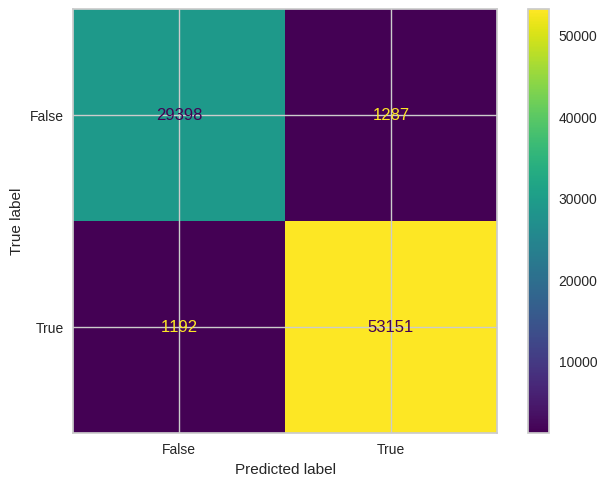

In [91]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod5, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod5,y_train)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['5']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [92]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



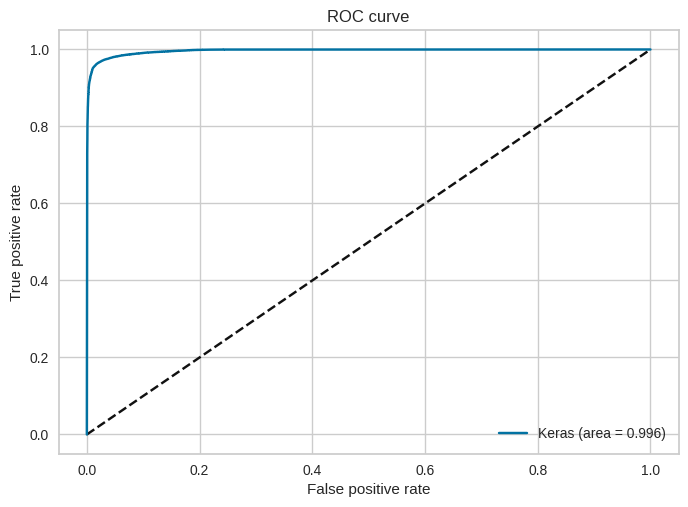

In [93]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.8042527167521287
score on train: 0.8351561142327522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.95      0.94     30685
           1       0.99      0.97      0.98     19493
           2       0.56      0.77      0.65     14798
           3       0.63      0.59      0.61      7903
           4       0.41      0.16      0.23      5312
           5       0.85      0.70      0.76      4653
           6       0.53      0.06      0.12       850
           7       0.19      0.02      0.04       771
           8       0.16      0.01      0.02       509
           9       0.00      0.00      0.00        54

    accuracy                           0.80     85028
   macro avg       0.52      0.42      0.43     85028
weighted avg       0.79      0.80      0.79     85028



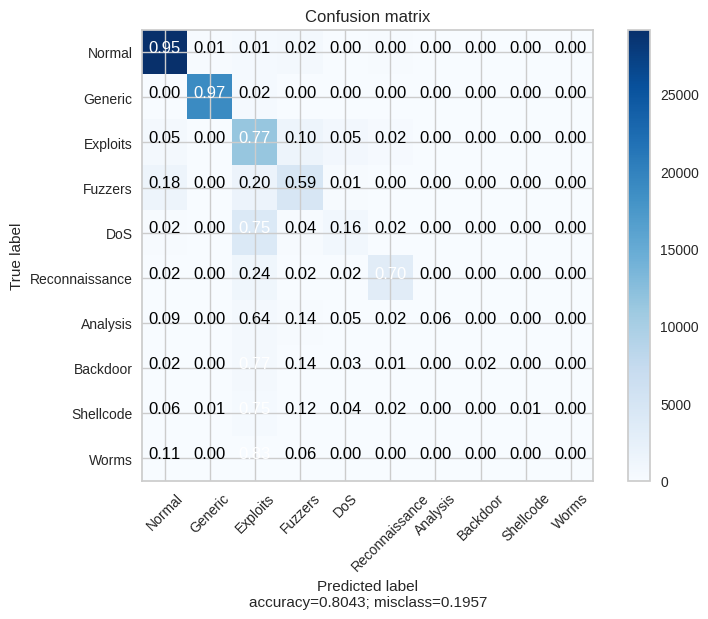

In [94]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod5, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod5, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['5']=acc

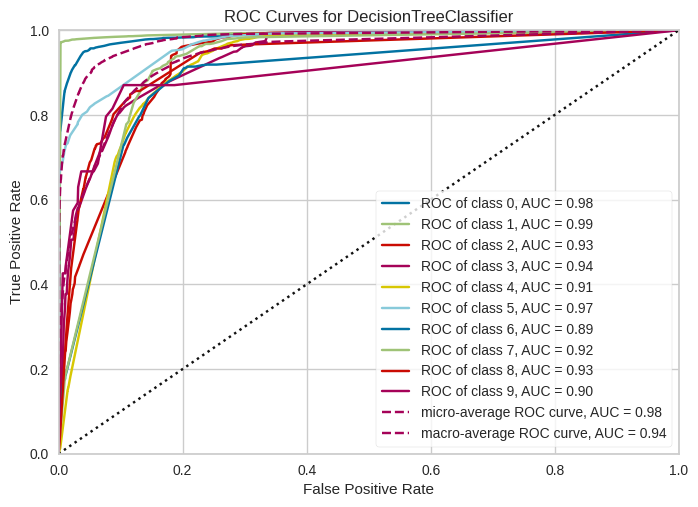

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [95]:
plot_ROC_curve(dtree1, X_train_mod5, y_multi_train, X_test, y_multi_test)

<ipython-input-96-adb9130efb5e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod5, y_multi_train)


score on test: 0.7780260620031049
score on train: 0.8175114406534206
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     30685
           1       1.00      0.96      0.98     19493
           2       0.52      0.93      0.67     14798
           3       0.81      0.31      0.45      7903
           4       0.50      0.01      0.03      5312
           5       0.96      0.31      0.47      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.78     85028
   macro avg       0.46      0.35      0.35     85028
weighted avg       0.78      0.78      0.73     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


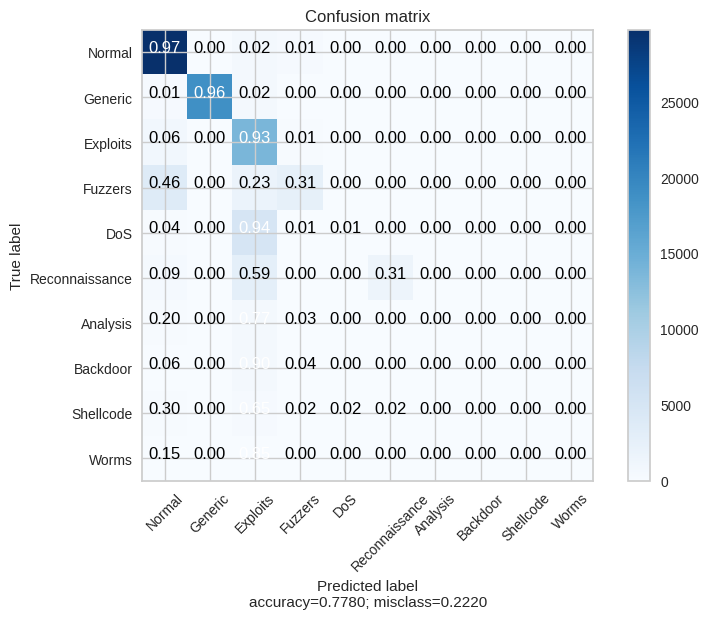

In [96]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod5, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod5, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['5']=acc

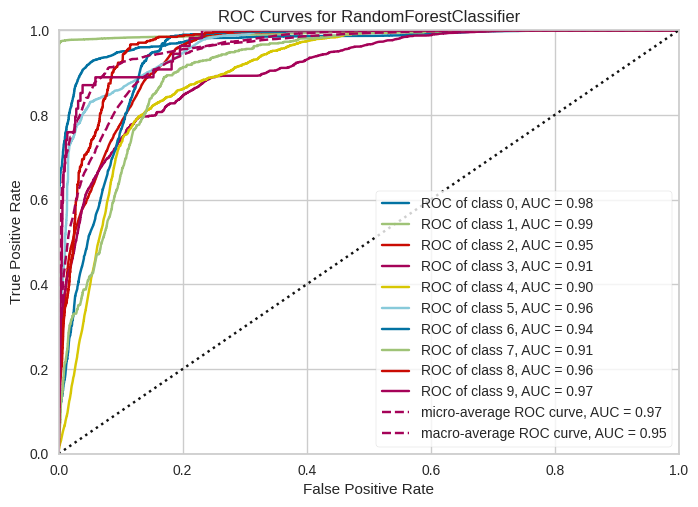

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [97]:
plot_ROC_curve(rf2, X_train_mod5, y_multi_train, X_test, y_multi_test)

score on test: 0.8121207131768359
score on train: 0.9087759949023924
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30685
           1       1.00      0.83      0.90     19493
           2       0.62      0.85      0.72     14798
           3       0.58      0.70      0.64      7903
           4       0.39      0.26      0.31      5312
           5       0.90      0.75      0.82      4653
           6       0.64      0.03      0.06       850
           7       0.70      0.08      0.14       771
           8       0.56      0.37      0.44       509
           9       0.40      0.31      0.35        54

    accuracy                           0.81     85028
   macro avg       0.67      0.51      0.53     85028
weighted avg       0.82      0.81      0.81     85028



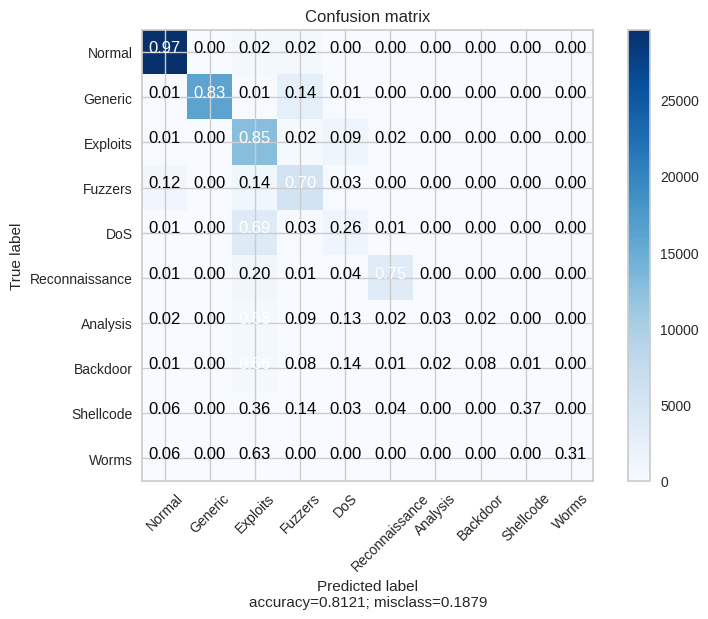

In [98]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod5, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod5, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['5']=acc

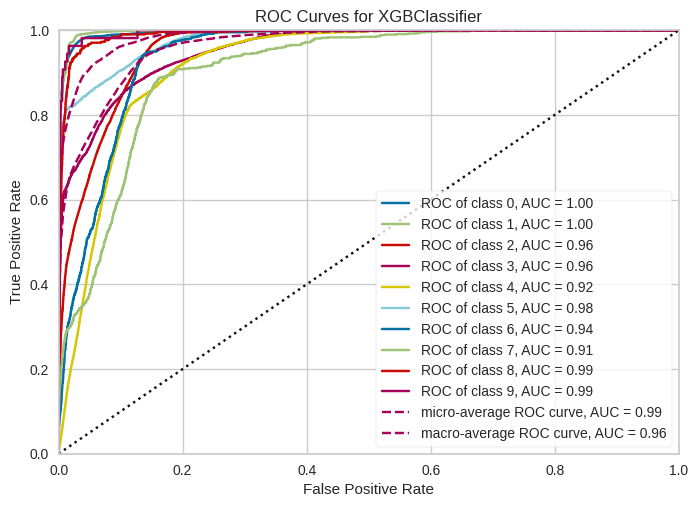

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [99]:
plot_ROC_curve(xgb2, X_train_mod5, y_multi_train, X_test, y_multi_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               5504      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.9138 - accuracy: 0.6668
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.

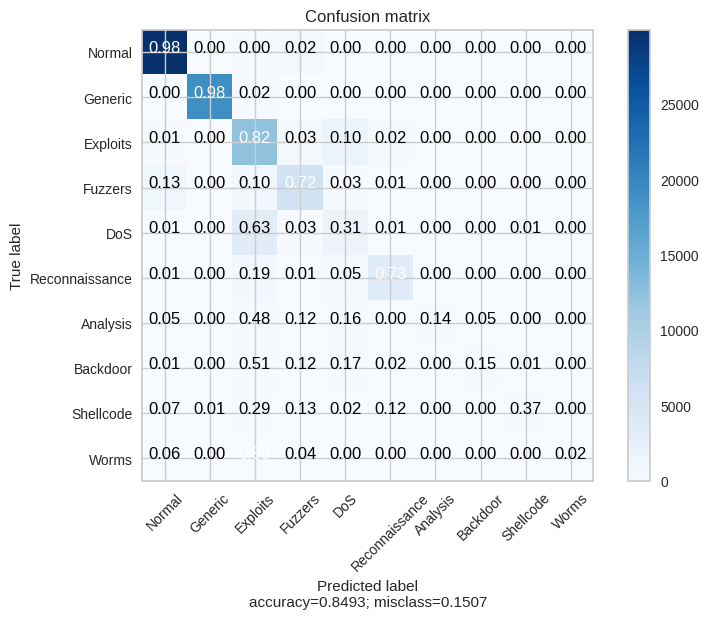

In [100]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod5,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['5']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod5,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [101]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     30685
           1       0.99      0.98      0.99     19493
           2       0.65      0.82      0.73     14798
           3       0.79      0.72      0.75      7903
           4       0.41      0.31      0.35      5312
           5       0.87      0.73      0.80      4653
           6       0.66      0.14      0.24       850
           7       0.41      0.15      0.22       771
           8       0.54      0.37      0.44       509
           9       0.33      0.02      0.04        54

    accuracy                           0.85     85028
   macro avg       0.66      0.52      0.55     85028
weighted avg       0.85      0.85      0.84     85028



ROC AUC score: 0.9706003663890241


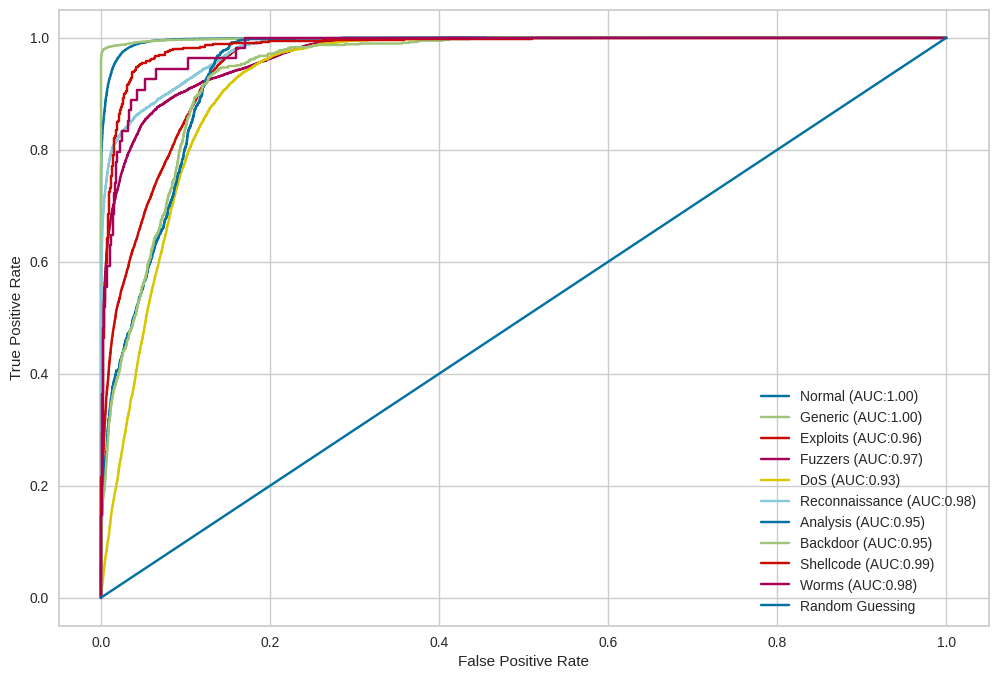

In [102]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Noise range 6

In [103]:
noise6 = 6
X_train_mod6 = modify_dataset(X_train, variables_to_poison, noise6)

X_train_mod6

array([[ 0.59684299, -0.20930296, -7.53270056, ...,  0.19056617,
         6.55514134, -0.11941291],
       [-0.36703788, -0.09291996,  6.01417556, ...,  6.72333316,
        12.36949604, -0.11941291],
       [-0.95475965, -0.20623564,  1.19794606, ..., -4.16996098,
         6.61598993, -0.11941291],
       ...,
       [-0.04595536, -0.20930296,  6.36362721, ..., -8.60200324,
        -7.12156251, -0.11941291],
       [ 1.1713472 , -0.20930296, -6.88185267, ..., -1.37994077,
         4.13805174, -0.11941291],
       [ 1.32109174, -0.1171253 , -4.41531549, ..., -6.00084013,
        -5.79407908, -0.11941291]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8943289269417133
score on train: 0.893112437003997
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     30685
           1       0.88      0.97      0.92     54343

    accuracy                           0.89     85028
   macro avg       0.91      0.87      0.88     85028
weighted avg       0.90      0.89      0.89     85028



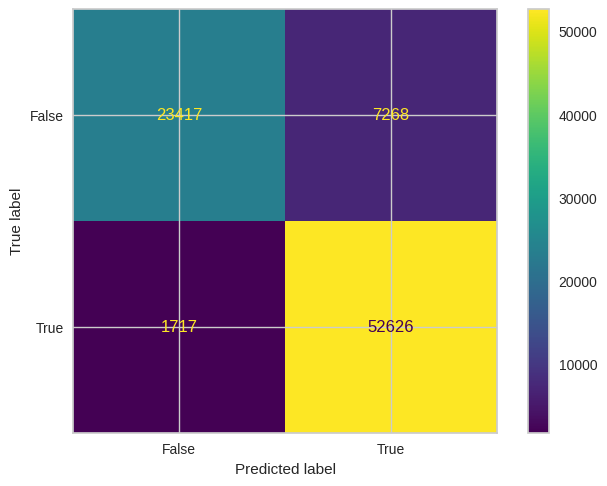

In [104]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train_mod6, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train_mod6, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['6']=acc

AUC: 0.9532


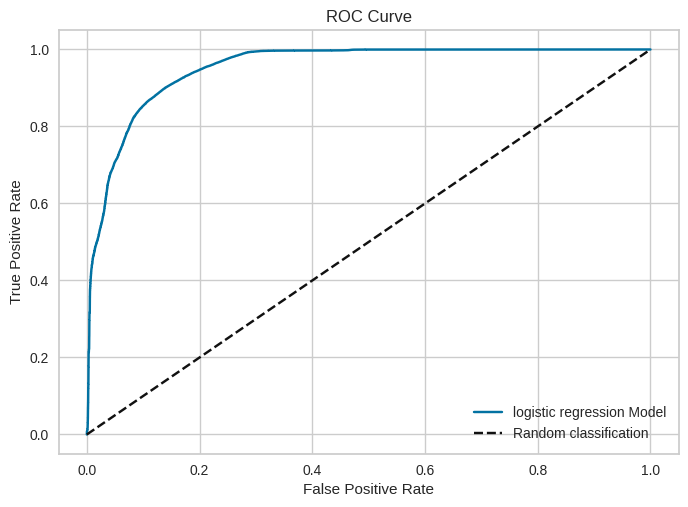

In [105]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-106-6f5d5b3d70e0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_mod6, y_train)


score on test: 0.9453238933057346
score on train: 0.9464056073683601
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     30685
           1       0.96      0.96      0.96     54343

    accuracy                           0.95     85028
   macro avg       0.94      0.94      0.94     85028
weighted avg       0.95      0.95      0.95     85028



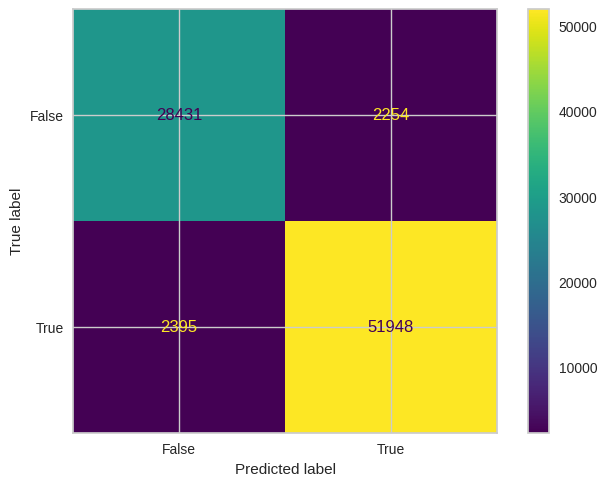

In [106]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train_mod6, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train_mod6, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['6']=acc

AUC: 0.9875


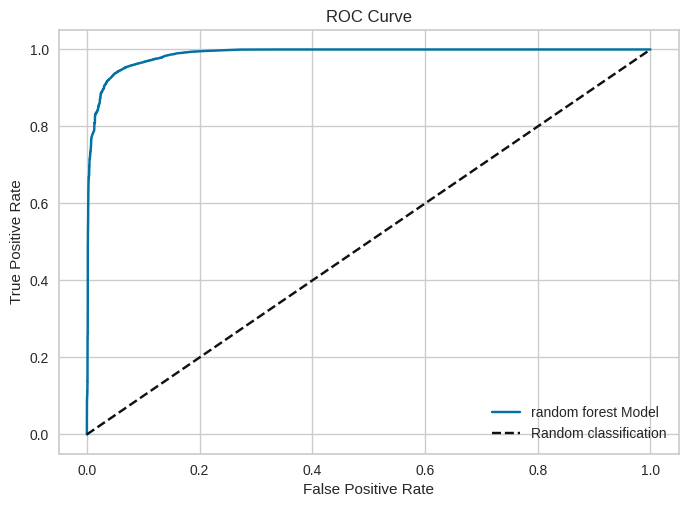

In [107]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9695629674930611
score on train: 0.9915194346289753
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     30685
           1       0.97      0.99      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.97     85028
weighted avg       0.97      0.97      0.97     85028



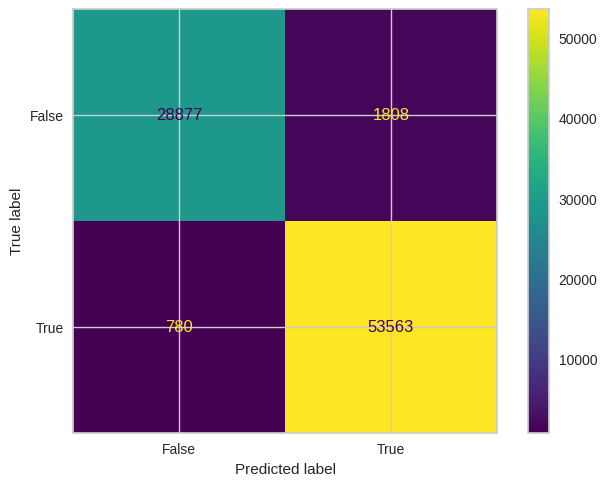

In [108]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train_mod6, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train_mod6, y_train)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['6']=acc

AUC: 0.9967


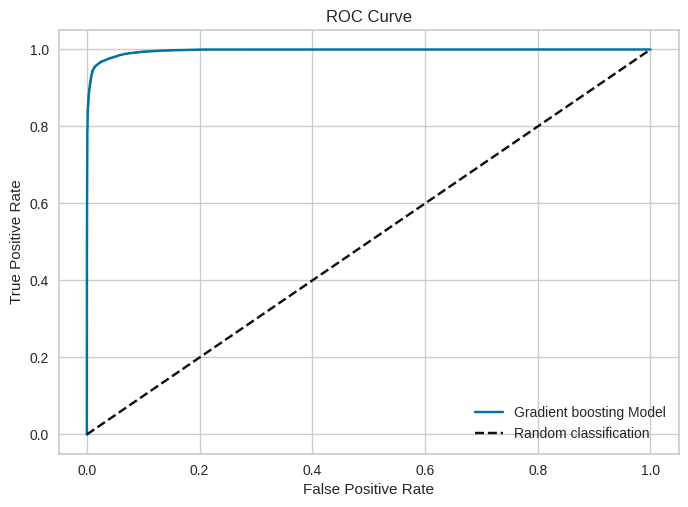

In [109]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8746
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.2055 - accuracy: 0.9067
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1852 - accuracy: 0.9155
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1768 - accuracy: 0.9198
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1677 - accuracy: 0.9231
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.9281
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1485 - accuracy: 0.9317
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1419 - accuracy: 0.9345
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1368 - accuracy: 0.9373
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

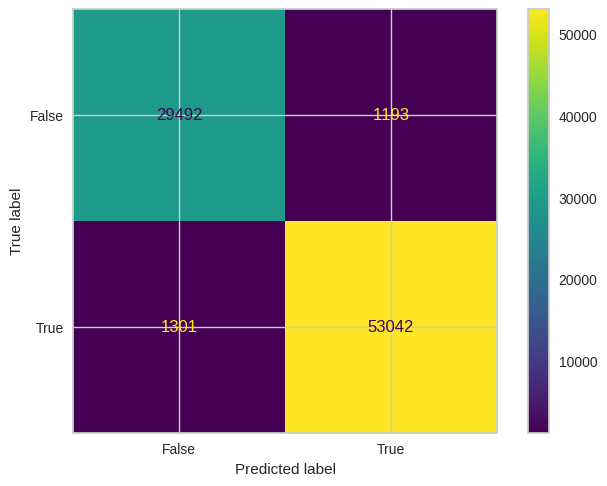

In [110]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train_mod6, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train_mod6,y_train)[1]))

scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['6']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [111]:
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.97      0.97     85028
weighted avg       0.97      0.97      0.97     85028



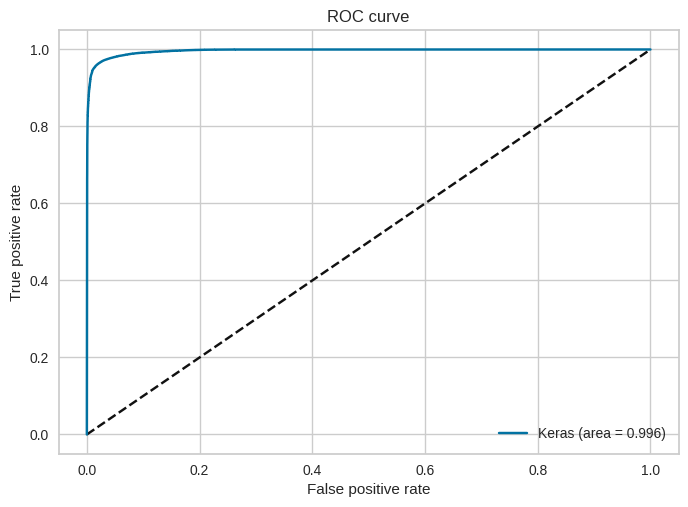

In [112]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.767358987627605
score on train: 0.8352430052713897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94     30685
           1       1.00      0.81      0.90     19493
           2       0.56      0.77      0.65     14798
           3       0.63      0.59      0.61      7903
           4       0.42      0.16      0.23      5312
           5       0.83      0.63      0.71      4653
           6       0.53      0.06      0.12       850
           7       0.01      0.02      0.01       771
           8       0.19      0.01      0.02       509
           9       0.00      0.00      0.00        54

    accuracy                           0.77     85028
   macro avg       0.51      0.40      0.42     85028
weighted avg       0.79      0.77      0.77     85028



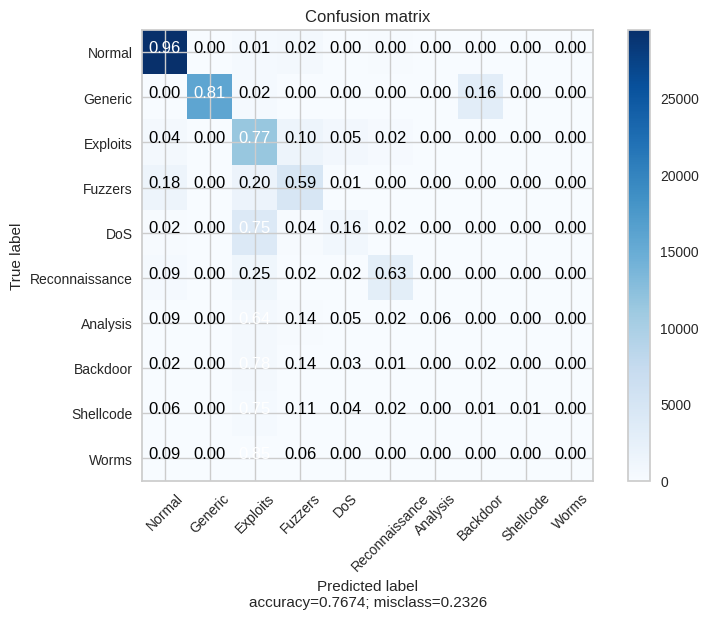

In [113]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train_mod6, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train_mod6, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['6']=acc

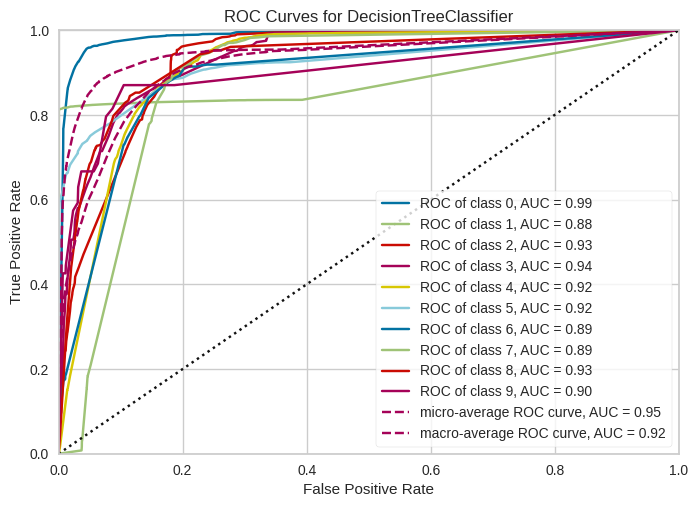

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [114]:
plot_ROC_curve(dtree1, X_train_mod6, y_multi_train, X_test, y_multi_test)

<ipython-input-115-3b082d3dcb17>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod6, y_multi_train)


score on test: 0.7401561838453216
score on train: 0.8165208828129525
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     30685
           1       1.00      0.78      0.88     19493
           2       0.54      0.89      0.67     14798
           3       0.70      0.37      0.48      7903
           4       0.44      0.13      0.21      5312
           5       0.89      0.30      0.45      4653
           6       0.00      0.00      0.00       850
           7       0.00      0.00      0.00       771
           8       0.00      0.00      0.00       509
           9       0.00      0.00      0.00        54

    accuracy                           0.74     85028
   macro avg       0.43      0.34      0.36     85028
weighted avg       0.74      0.74      0.71     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


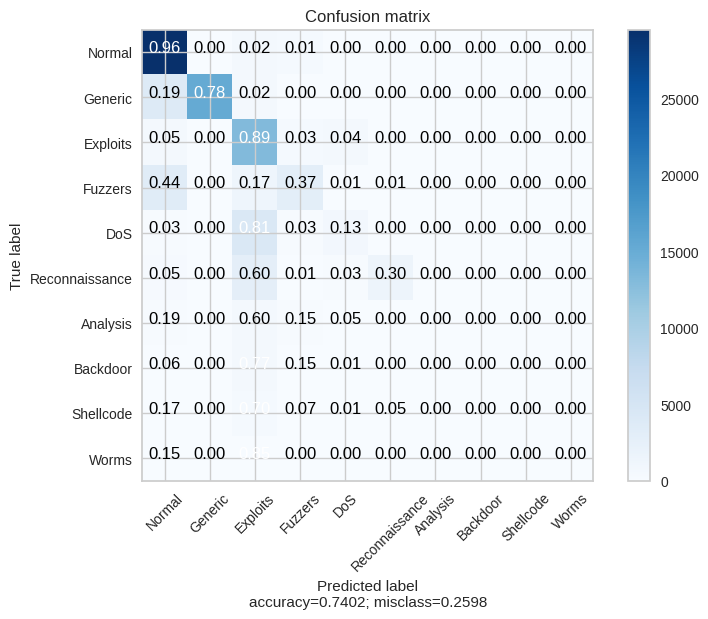

In [115]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train_mod6, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train_mod6, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['6']=acc

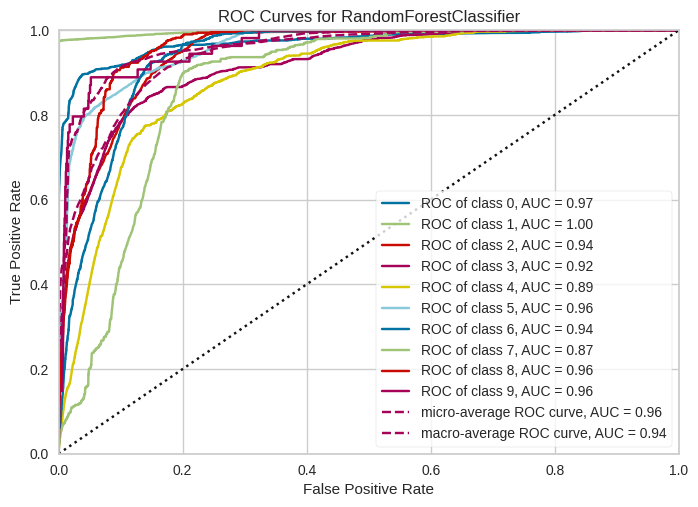

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [116]:
plot_ROC_curve(rf2, X_train_mod6, y_multi_train, X_test, y_multi_test)

score on test: 0.8415110316601591
score on train: 0.9072756763019174
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30685
           1       1.00      0.96      0.98     19493
           2       0.64      0.81      0.71     14798
           3       0.81      0.71      0.76      7903
           4       0.38      0.36      0.37      5312
           5       0.85      0.77      0.81      4653
           6       0.58      0.05      0.10       850
           7       0.44      0.06      0.10       771
           8       0.49      0.25      0.33       509
           9       0.48      0.30      0.37        54

    accuracy                           0.84     85028
   macro avg       0.66      0.52      0.55     85028
weighted avg       0.84      0.84      0.84     85028



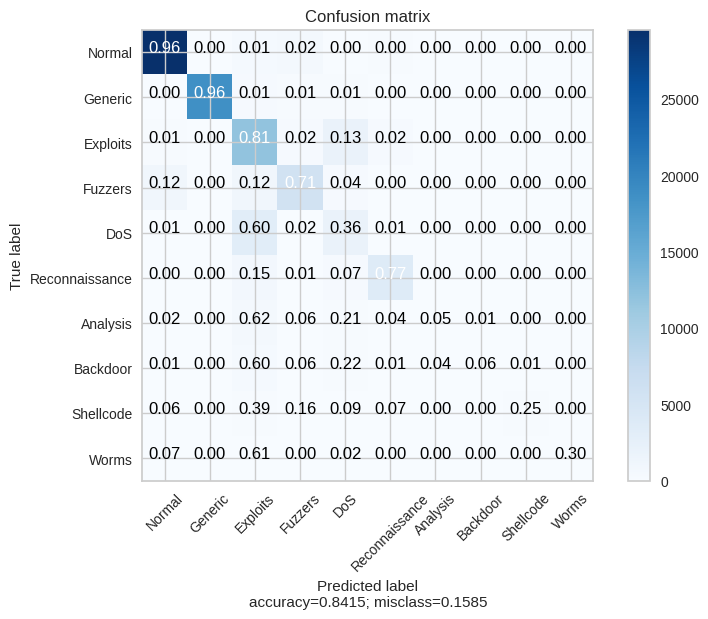

In [117]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train_mod6, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train_mod6, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['6']=acc

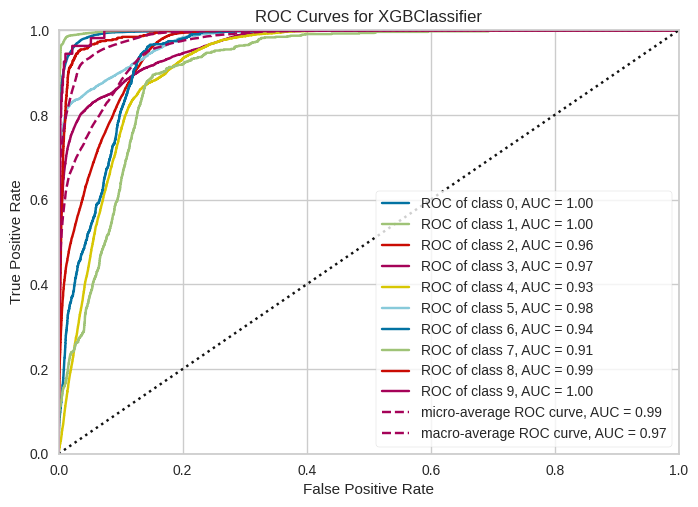

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [118]:
plot_ROC_curve(xgb2, X_train_mod6, y_multi_train, X_test, y_multi_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               5504      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.9329 - accuracy: 0.6592
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0

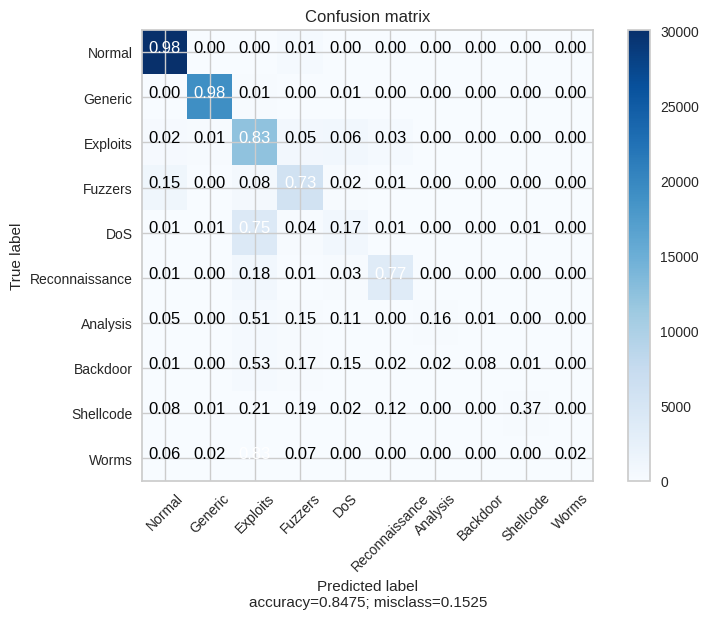

In [119]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train_mod6,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = np.argmax(y_pred_arr, axis=1)

scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['6']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train_mod6,y_multi_train)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [120]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     30685
           1       0.99      0.98      0.98     19493
           2       0.64      0.83      0.72     14798
           3       0.76      0.73      0.74      7903
           4       0.38      0.17      0.24      5312
           5       0.83      0.77      0.80      4653
           6       0.58      0.16      0.26       850
           7       0.73      0.08      0.14       771
           8       0.54      0.37      0.44       509
           9       0.05      0.02      0.03        54

    accuracy                           0.85     85028
   macro avg       0.65      0.51      0.53     85028
weighted avg       0.84      0.85      0.83     85028



ROC AUC score: 0.9694695222203764


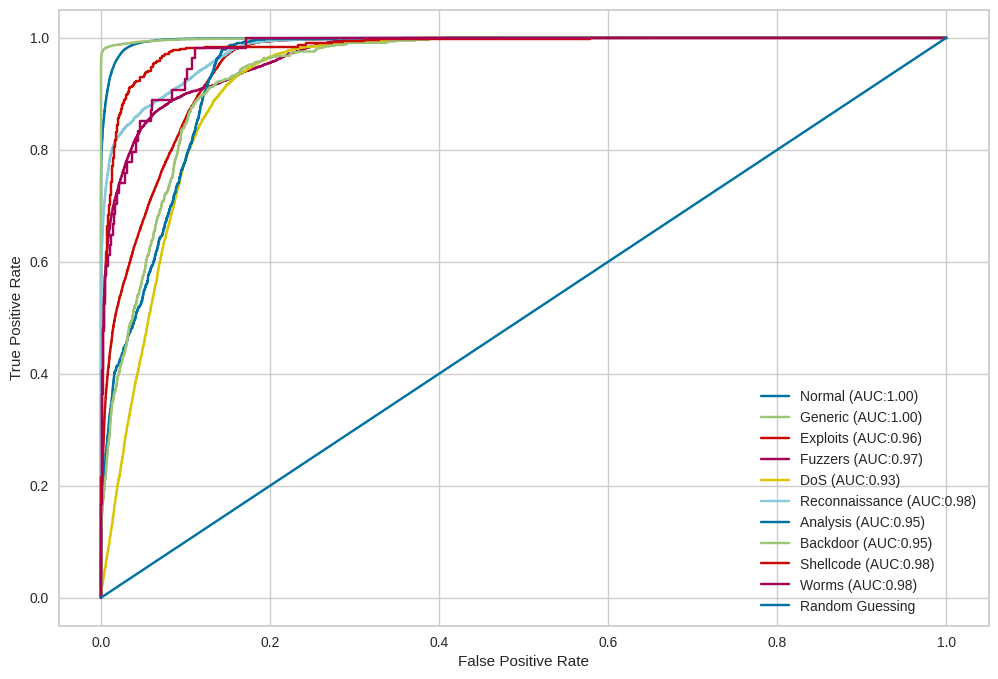

In [121]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Accuracies plots

In [122]:
import plotly.express as px
levels = list(res_log.keys())
accuracies = list(res_log.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the logistic regression')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [123]:
levels = list(res_rf_b.keys())
accuracies = list(res_rf_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [124]:
levels = list(res_xgb_b.keys())
accuracies = list(res_xgb_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [125]:
levels = list(res_nn_b.keys())
accuracies = list(res_nn_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [126]:
levels = list(res_tree.keys())
accuracies = list(res_tree.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the decision tree')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [127]:
levels = list(res_rf_m.keys())
accuracies = list(res_rf_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [128]:
levels = list(res_xgb_m.keys())
accuracies = list(res_xgb_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [129]:
levels = list(res_nn_m.keys())
accuracies = list(res_nn_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Noise range',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()